**MAESTRÍA EN INTELIGENCIA ARTIFICIAL  APLICADA**

**Curso: TC5044 - Operaciones de aprendizaje automático (MLOps)**

**Tecnológico de Monterrey**

Dr. Gerardo Rodríguez Hernández

Prof. José Ángel Martínez Navarro

**Semana 5**
Fase 1 | Avance de Proyecto

**Equipo 18**
- Ali Mateo Campos Martínez      A01796071
- Mario Fonseca Martínez         A01795228
- Miguel Ángel Hernández Núñez   A01795751
- Jonatan Israel Meza Mendoza    A01275322
- Eder Mauricio Castillo Galindo A01795453

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [12]:
# Cargar dataset modificado
df = pd.read_csv("/content/drive/MyDrive/OPS con ML/turkish_music_emotion_modified.csv")
# df = pd.read_csv("turkish_music_emotion_modified.csv")

# Revisar primeras filas
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,mixed_type_col
0,relax,0.052,NaN,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.97,979
1,relax,0.125,0.439,6.680,142.24,4.058,0.516,0.785,0.397,0.556,...,1.000,0,0.984,0.285,0.211,-0.082,3.364,0.702,0.967,943
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.746,0.016,1,0.413,28.106,0.134,1.682,0.692,0.963,628
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,1.000,0.161,0.757,error,0.265,0.042,0.354,0.743,0.968,192
4,relax,0.066,0.591,9.769,88.89,3.217,0.228,0.814,0.096,0.434,...,0.404,1,0.001,0.345,0.261,0.089,0.748,0.674,0.957,292


# **Tarea 2 y 3**. Manipulación, preparación, exploración y preprocesamiento de datos

## **Parte 1**. Manipulación y preparación

### Información general

En el artículo original, se menciona que el dataset original solo tenía 408 filas, ellos ocuparon una técnica de ampliación para poder tener más información.

Lo ideal sería divir el dataset en 3 partes (entrenamiento, validación y prueba) y solo analizar el de entrenamiento, pero al ser un dataset muy pequeño, decidimos analizarlo todo.

El peligro más fuerte de recurrir de esto es el 'data leakage', es decir, sesgar el modelo y que tenga problemas al enfrentarse con los datos en el mundo real. No es correcto analizar todos los datos del dataset, para poder 'simular' que el modelo se enfrenta a datos 'reales'.

Pero al ser un dataset con objetivos 'científicos', decidimos usarlo de está forma para un mejor entendimiento del mismo, independientemente que nosotros le demos otro enfoque después.


---

**En la parte 2** aplicamos la buena práctica de dividir los datos en entrenamiento, validación y prueba.

In [13]:
# 52 columnas por 408 filas
df.shape

(408, 52)

In [14]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           403 non-null    object 
 1   _RMSenergy_Mean                                 401 non-null    object 
 2   _Lowenergy_Mean                                 404 non-null    float64
 3   _Fluctuation_Mean                               405 non-null    float64
 4   _Tempo_Mean                                     401 non-null    object 
 5   _MFCC_Mean_1                                    402 non-null    float64
 6   _MFCC_Mean_2                                    403 non-null    float64
 7   _MFCC_Mean_3                                    397 non-null    object 
 8   _MFCC_Mean_4                                    402 non-null    object 
 9   _MFCC_Mean_5                               

In [15]:
# Contar cuántas son object (texto/categorías)
num_object = df.select_dtypes(include="object")

# Contar cuántas son numéricas
num_numeric = df.select_dtypes(include="number")

print(f"Columnas tipo object: {num_object.shape[1]}")
print(f"Columnas numéricas: {num_numeric.shape[1]}")

Columnas tipo object: 38
Columnas numéricas: 14


In [16]:
# Porcentaje (%) de valores faltantes por columna
df.isna().sum().mul(100).div(len(df)).sort_values(ascending=False)

,0
mixed_type_col,9.313725
_MFCC_Mean_11,2.696078
_MFCC_Mean_3,2.696078
_MFCC_Mean_5,1.960784
_Spectralcentroid_Mean,1.960784
_HarmonicChangeDetectionFunction_Mean,1.960784
_MFCC_Mean_12,1.960784
_Tempo_Mean,1.715686
_Pulseclarity_Mean,1.715686
_RMSenergy_Mean,1.715686


### Análisis de variables numéricas

In [17]:
# Estadística descriptiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_Lowenergy_Mean,404.0,4.241829,50.714118,0.302,0.52300,0.5535,0.58500,805.528
_Fluctuation_Mean,405.0,9.711723,32.204572,3.987,5.85200,6.7450,7.83800,483.105
_MFCC_Mean_1,402.0,6.270055,37.120651,0.423,1.95875,2.4200,2.90000,565.490
_MFCC_Mean_2,403.0,7.599908,77.807229,-43.608,-0.26700,0.0650,0.41350,946.483
_MFCC_Mean_13,406.0,1.004042,19.712898,-0.620,-0.04400,0.0390,0.10500,397.220
_AttackTime_Slope,402.0,4.055219,49.192974,-0.465,-0.09300,0.0100,0.08975,732.036
_Eventdensity_Mean,405.0,8.865998,67.375263,0.234,1.73700,2.7730,3.74200,998.241
_Pulseclarity_Mean,401.0,4.355584,49.896492,0.011,0.13000,0.2180,0.33100,794.363
_Spectralcentroid_Mean,400.0,4625.624853,21765.211883,606.524,1983.39500,2547.6780,3179.98675,318051.072
_Chromagram_Mean_3,405.0,2.682472,45.699208,0.000,0.08300,0.2990,0.59500,920.000


In [18]:
# Forma (asimetría)
df.skew(numeric_only=True).sort_values(ascending=False)
# Todas las variables numéricas tienen sesgo positivo, es decir su promedio es mayor que la moda.

,0
_MFCC_Mean_13,20.147970
_Chromagram_Mean_3,20.118656
_Chromagram_Mean_10,20.045608
_Lowenergy_Mean,14.444717
_Chromagram_Mean_9,14.111677
_Pulseclarity_Mean,13.526342
_Fluctuation_Mean,13.223509
_AttackTime_Slope,12.887338
_Eventdensity_Mean,12.461290
_MFCC_Mean_1,12.268594


In [19]:
# Forma (curtosis)
df.kurt(numeric_only=True).sort_values(ascending=False)

,0
_MFCC_Mean_13,405.960372
_Chromagram_Mean_3,404.839071
_Chromagram_Mean_10,402.209418
_Lowenergy_Mean,211.045891
_Chromagram_Mean_9,198.469578
_Pulseclarity_Mean,192.842101
_Fluctuation_Mean,180.148383
_AttackTime_Slope,171.826077
_Eventdensity_Mean,164.068311
_MFCC_Mean_1,163.872334


In [20]:
def plot_numeric_eda(df: pd.DataFrame, bins: int = 20) -> None:
    """
    Genera histogramas y boxplots para todas las columnas numéricas del DataFrame.
    - Detecta automáticamente las columnas numéricas.
    - Muestra en pantalla ambas visualizaciones.

    Parámetros:
        df (pd.DataFrame): DataFrame a analizar
        bins (int): número de intervalos para los histogramas
    """
    numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()

    if not numeric_cols:
        print("No se encontraron columnas numéricas en el DataFrame!")
        return

    #print(f"Columnas numéricas detectadas ({len(numeric_cols)}): {numeric_cols}\n")

    # --- Histogramas ---
    print("Distribución de variables numéricas (Histogramas)")
    df[numeric_cols].hist(
        figsize=(15, 10),
        bins=bins,
        color="skyblue",
        edgecolor="black"
    )
    plt.suptitle("Distribución de variables numéricas", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # --- Boxplots ---
    print("\nDispersión y posibles outliers (Boxplots)")
    df[numeric_cols].plot(
        kind="box",
        subplots=True,
        layout=(max(1, len(numeric_cols) // 3 + 1), 3),
        figsize=(15, 16),
        sharex=False,
        sharey=False,
        vert=False,
        color=dict(boxes="blue", whiskers="black", medians="red", caps="gray")
    )
    plt.suptitle("Boxplots de variables numéricas", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Distribución de variables numéricas (Histogramas)


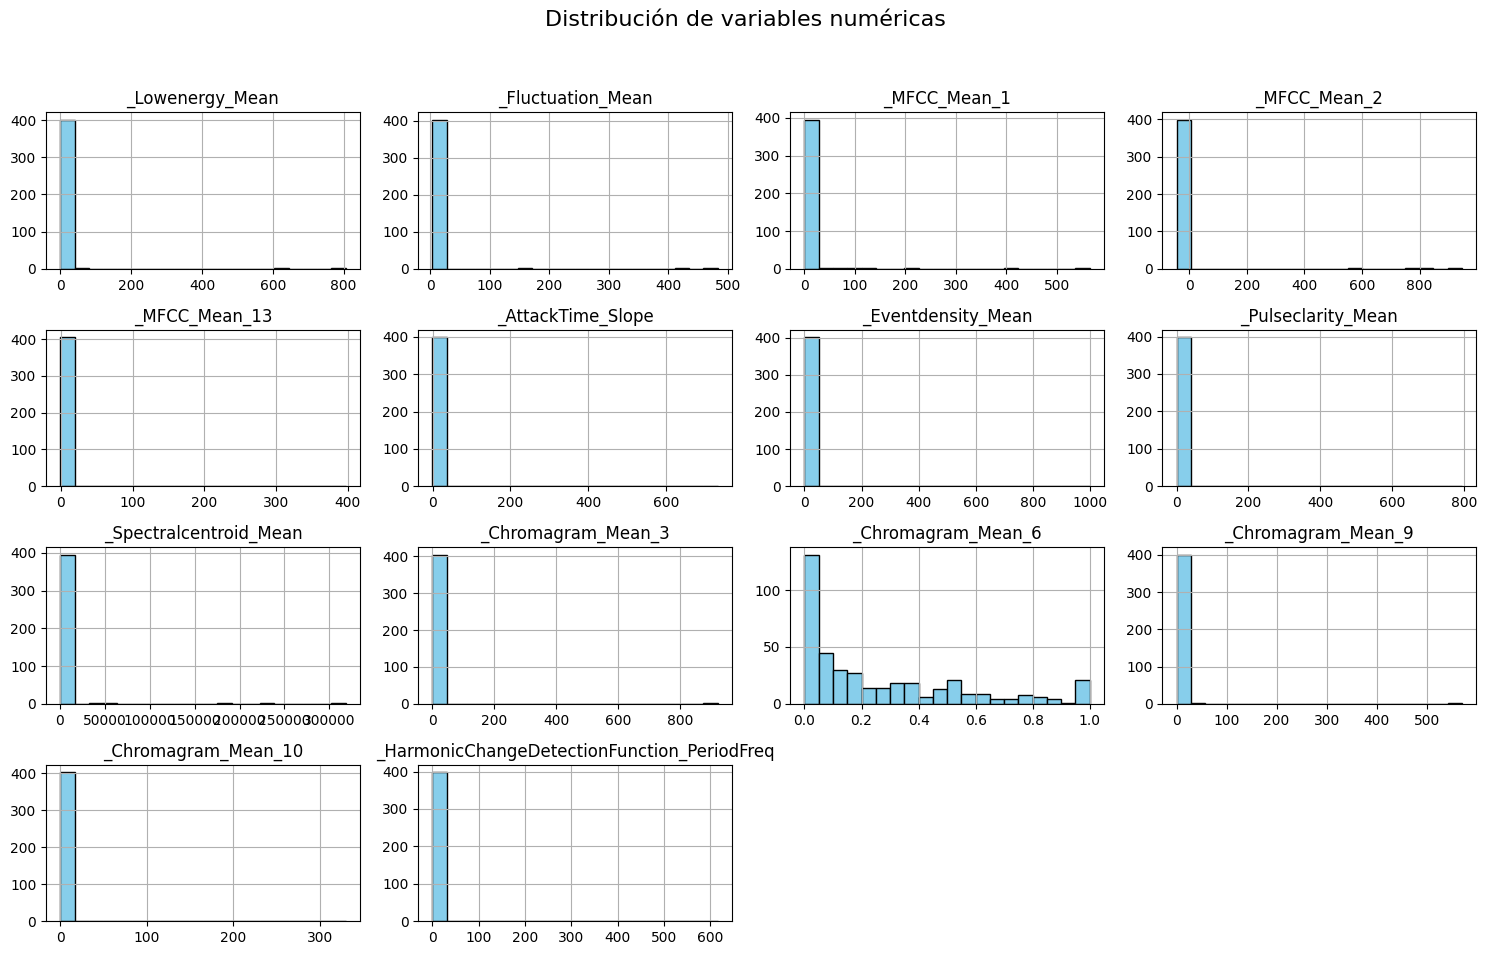


Dispersión y posibles outliers (Boxplots)


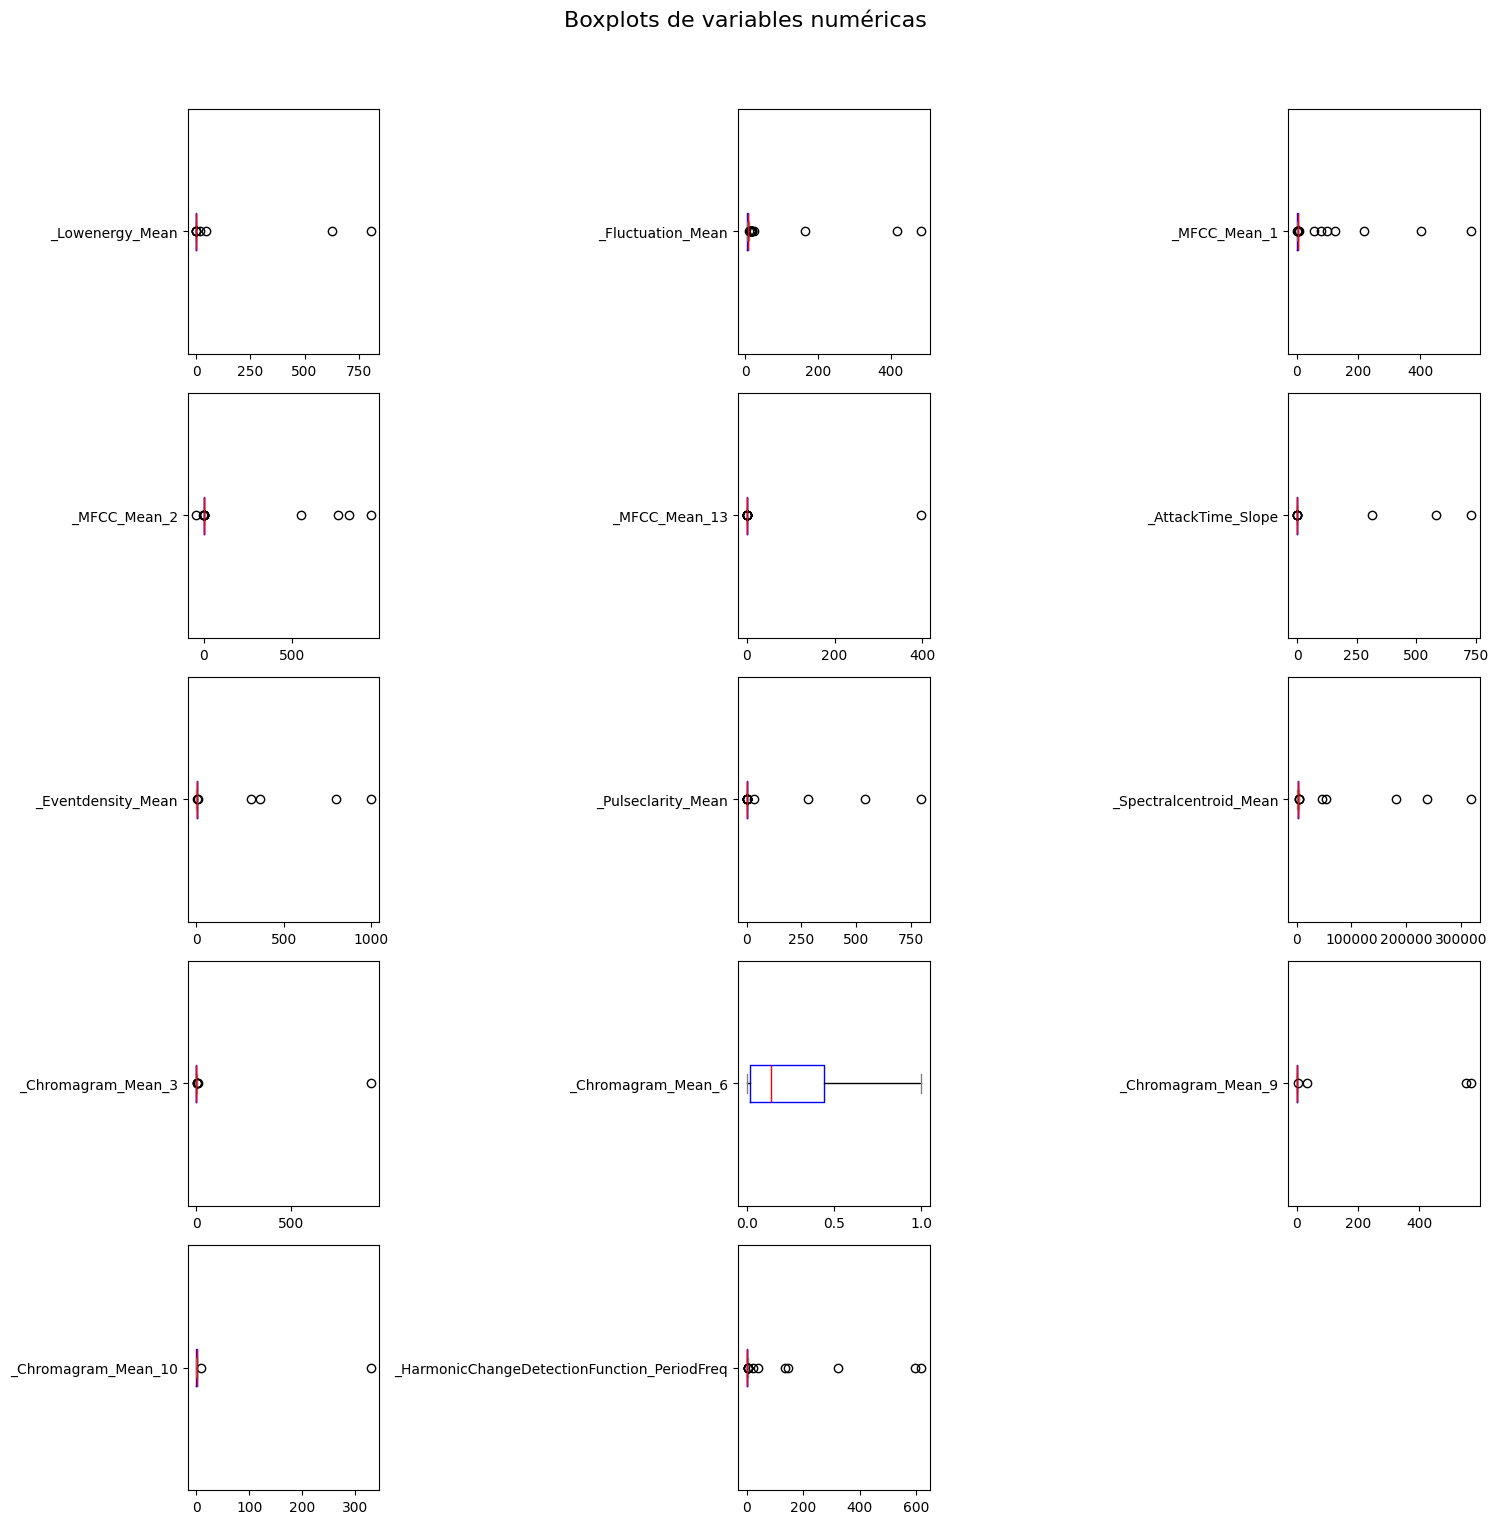

In [21]:
# Gráficas
plot_numeric_eda(df)

- Los histogramas anteriores sugieren que existen varios valores atípicos en diferentes columnas.

- Es importante eliminar estos valores atípicos para poder evitar que el modelo tenga sesgos.

### Análisis de variables categóricas

In [22]:
# Descripción estadística
df.describe(include='O').T

,count,unique,top,freq
Class,403,8,relax,100
_RMSenergy_Mean,401,201,0.06,6
_Tempo_Mean,401,381,150.255,3
_MFCC_Mean_3,397,314,0.259,5
_MFCC_Mean_4,402,316,0.123,5
_MFCC_Mean_5,400,296,0.144,4
_MFCC_Mean_6,404,297,0.138,5
_MFCC_Mean_7,405,304,0.073,5
_MFCC_Mean_8,405,272,-0.005,6
_MFCC_Mean_9,405,276,-0.018,5


- No sólo el nombre de las columnas sino adicionalmente la moda de la tabla anterior sugiere que son realmente valores numéricos. mixed_type_col y Class son las únicas que sugieren ser tipo string.

A continuación revisamos el detalle:

In [23]:
# Recuentos únicos (número de ocurrencias para cada valor único)
cat_cols = ["Class", "mixed_type_col"]

for col in cat_cols:
    print(df[col].value_counts(dropna=False))
    print("\n")

Class
relax      100
sad         99
happy       98
angry       93
NaN          5
 ANGRY       4
 HAPPY       4
 SAD         3
 RELAX       2
Name: count, dtype: int64


mixed_type_col
bad        42
unknown    39
NaN        38
987         3
488         2
           ..
376         1
206         1
373         1
448         1
687         1
Name: count, Length: 258, dtype: int64




In [24]:
def plot_counts(df: pd.DataFrame, col: str, ascending: bool = False, horizontal: bool = False, min_count: int | None = None) -> None:
    """
    Grafica el conteo de valores únicos en una columna categórica.

    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.
        col (str): Nombre de la columna a graficar.
        ascending (bool): Si True, ordena por frecuencia ascendente.
        horizontal (bool): Si True, muestra el gráfico de barras horizontal.
        min_count (int): Si se proporciona, solo muestra valores con al menos ese conteo.
    """
    # Contar valores
    counts = df[col].value_counts(ascending=ascending, dropna=False)

    if min_count is not None:
      counts = counts[counts > min_count]

    # Crear figura
    fig, ax = plt.subplots(figsize=(8, 5))

    if horizontal:
        counts.plot(kind="barh", color="skyblue", edgecolor="black", ax=ax)
        ax.set_xlabel("Conteo")
        ax.set_ylabel(col)
        ax.set_title(f"Distribución de {col}")
        for i, (value, count) in enumerate(counts.items()):
            ax.text(count + 0.5, i, str(count), va="center", fontsize=10)
    else:
        counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
        ax.set_ylabel("Conteo")
        ax.set_xlabel(col)
        ax.set_title(f"Distribución de {col}")
        for i, count in enumerate(counts):
            ax.text(i, count + 0.5, str(count), ha="center", va="bottom", fontsize=10)

    plt.tight_layout()
    plt.show()

* "mixed_type_col" también parece ser un numérica, sólo que se requiere borrar los "bad", "unknown" y "NaN", ya que según en el entidimiento de la columna, son valores que no que no se pueden clasificar.

* Si imprimiámos la gráfica con todas las categorias era imposible obtener información contundente. Recurrimos a imprimir las que tengan más de 2 datos, donde podemos observar que las columnas con más datos son las que indican que: "No se tiene información", "Se desconoce" o "es malo".

* La columna tiene valores faltantes.

* Adicionalmente, es importante mencionar que está columna **no** se encuentra en el dataset original.

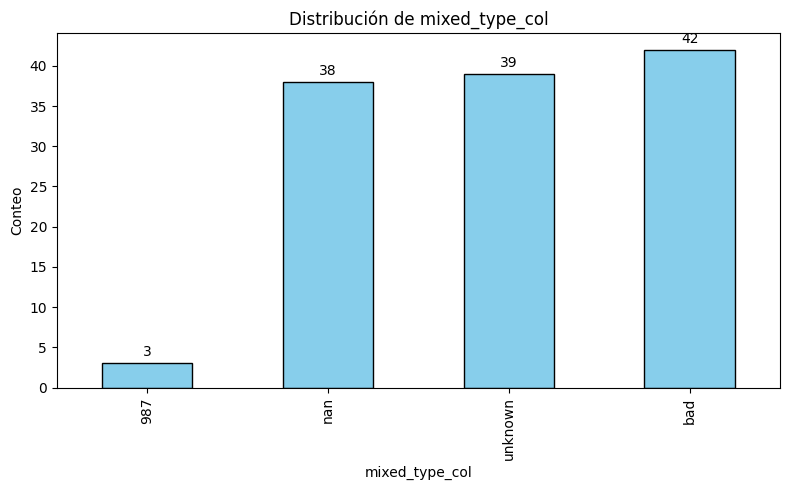

In [25]:
plot_counts(df, "mixed_type_col", ascending=True, min_count=2)

* La columna "Class" sólo requiere remover espacios al inicio y final de cada cadena y luego estandarizar los nombres, para poder obtener la cantidad exacta de los datos:
    * relax = RELAX
    * sad = SAD
    * happy = HAPPY
    * angry = ANGRY

* La columna tiene valores faltantes.

* De esa manera la única categórica sería nuestra variable a predecir "Class". Por lo tanto creamos una función para convertirlas a numéricas las que faltan:

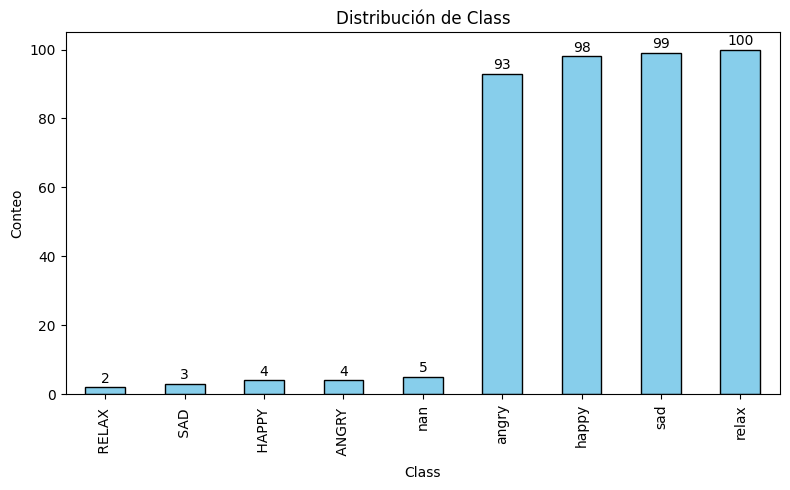

In [26]:
plot_counts(df, "Class", ascending=True)

### Limpieza de las columnas

In [27]:
def clean_object_columns_to_numeric(
    df: pd.DataFrame,
    target_col: str = "Class"
) -> tuple[pd.DataFrame, dict]:
    """
    Limpia columnas tipo object en un DataFrame:
    - Quita espacios al inicio y final.
    - Elimina espacios internos.
    - Reemplaza comas por puntos (ej: "0,56" -> "0.56").
    - Convierte a numérico con errors='coerce' (valores no numéricos -> NaN).
    - Excluye la columna objetivo (por defecto 'Class').
    - Genera un reporte con los valores no convertibles por columna.

    Retorna:
        df_clean: DataFrame limpio.
        non_numeric_report: dict {columna: [valores no convertibles]}
    """
    df_clean = df.copy()
    non_numeric_report = {}

    for col in df_clean.select_dtypes(include="object").columns:
        if col == target_col:
            continue  # excluir la variable objetivo

        # Guardar versión original para comparación
        original_values = df_clean[col].copy()

        # Limpieza general
        df_clean[col] = (
            df_clean[col]
            .astype(str)
            .str.strip()           # eliminar espacios extremos
            .str.replace(" ", "", regex=False)  # eliminar espacios internos
            .str.replace(",", ".", regex=False)  # cambiar coma por punto
        )

        # Convertir a número
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

        # Redondear a 3 cifras
        df_clean[col] = df_clean[col].round(3)

        # Detectar valores que se volvieron NaN
        mask_nan = df_clean[col].isna()
        invalid_values = original_values[mask_nan].dropna().unique()

        if len(invalid_values) > 0:
            non_numeric_report[col] = invalid_values.tolist()

    return df_clean, non_numeric_report

In [28]:
df_clean, report = clean_object_columns_to_numeric(df, target_col="Class")

In [29]:
print("\n Reporte de valores no convertibles:\n")
for col, vals in report.items():
    print(f" - {col}: {vals}")


 Reporte de valores no convertibles:

 - _RMSenergy_Mean: ['error']
 - _Tempo_Mean: ['error', 'invalid']
 - _MFCC_Mean_3: ['?']
 - _MFCC_Mean_4: ['invalid', 'error']
 - _MFCC_Mean_5: ['invalid']
 - _MFCC_Mean_6: ['?']
 - _MFCC_Mean_7: ['error']
 - _MFCC_Mean_8: ['invalid']
 - _MFCC_Mean_9: ['?']
 - _MFCC_Mean_10: ['error']
 - _MFCC_Mean_11: [' NAN ']
 - _MFCC_Mean_12: ['?', 'error']
 - _Roughness_Mean: ['invalid']
 - _Roughness_Slope: ['error']
 - _Zero-crossingrate_Mean: ['error']
 - _AttackTime_Mean: ['?']
 - _Rolloff_Mean: [' ERROR ', ' NAN ', ' INVALID ']
 - _Brightness_Mean: ['invalid', '?']
 - _Spectralspread_Mean: ['error']
 - _Spectralskewness_Mean: ['error', 'invalid', '?']
 - _Spectralkurtosis_Mean: ['invalid', 'error']
 - _Spectralflatness_Mean: ['invalid', 'error']
 - _EntropyofSpectrum_Mean: ['invalid', '?']
 - _Chromagram_Mean_1: ['invalid', ' NAN ']
 - _Chromagram_Mean_2: ['error']
 - _Chromagram_Mean_4: ['?']
 - _Chromagram_Mean_5: ['error', '?']
 - _Chromagram_Mean_7:

- Teniendo en cuenta los resultados anteriores sobre la columna objetivo, es evidente que se tienen solamente 4 clases, por lo que procedemos a realizar una función para procesar la variable objetivo y normalizar los datos:

In [30]:
def normalize_target_column(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Normaliza la columna de clases:
    - Convierte a string
    - Strip: elimina espacios al inicio y al final
    - Convierte a minúsculas
    - Reemplaza valores no válidos por NaN
    """
    df_clean = df.copy()

    df_clean[col] = (
        df_clean[col]
        .astype(str)             # asegurar string
        .str.strip()             # quitar espacios extremos
        .str.lower()             # pasar a minúsculas
    )

    # Reemplazar valores "nan" de texto (que aparecen al convertir) por np.nan
    df_clean[col] = df_clean[col].replace("nan", pd.NA)

    # Mantener solo las clases válidas
    valid_classes = {"happy", "sad", "angry", "relax"}
    df_clean.loc[~df_clean[col].isin(valid_classes), col] = pd.NA

    return df_clean

In [31]:
df_clean = normalize_target_column(df_clean, "Class")

In [32]:
df_clean["Class"].value_counts(dropna=False)

,count
Class,
relax,102
happy,102
sad,102
angry,97
<NA>,5


- Dado a que los faltantes en la variable objetivo son menos del 2%, se eliminarán pues no tiene sentido imputar esas etiquetas cuando son pocos faltantes.

In [33]:
df_clean = df_clean.dropna(subset=["Class"])

- Aquí ya podemos observar como los datos están normalizados con el mismo tipo, es decir, todos mayúsculas.

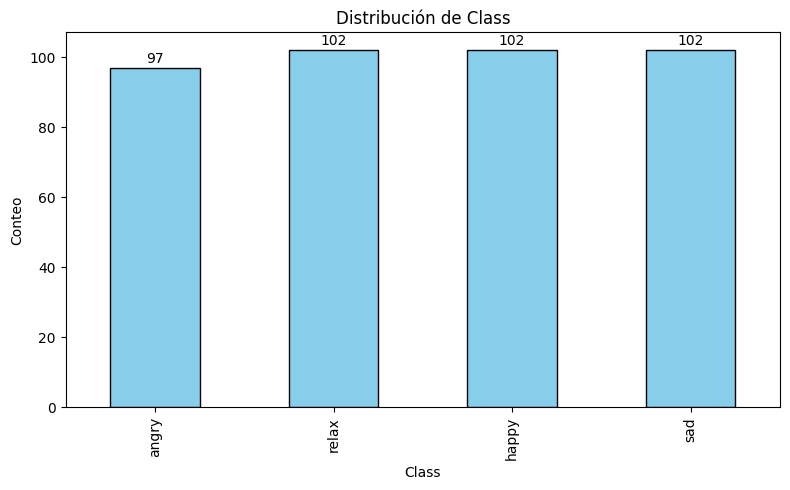

In [34]:
plot_counts(df_clean, "Class", ascending=True)

In [35]:
# Imprimos datos informativos de la clase descriptiva "Class"
df_clean.describe(include='O').T

,count,unique,top,freq
Class,403,4,relax,102


- La clase más grande (relax, con 102) es casi idéntica a la más pequeña (angry, con 97). La diferencia es de solo 5 instancias, lo que representa una variación mínima en el conjunto de datos (aproximadamente un 1.2% del total de las 403 instancias). Se concluye que no se requiere balanceo de clases.

### Porcentaje de los valores faltantes por columna


1. **df_clean.isna()** → DataFrame booleano con **True** donde hay valores faltantes (NaN) y **False** donde no.

2. .**sum()** → Suma por columna esos **True** (cuenta cuántos NaN hay en cada columna).

3. .**mul(100)** → Multiplica ese conteo por 100.

4. **.div(len(df_clean))** → Lo divide entre el número total de filas → ***porcentaje de NaN por columna.***

5. **.sort_values(ascending=False)** → Ordena de mayor a menor porcentaje.



---


**Resultado:** Una tabla con el porcentaje de valores faltantes por columna, empezando por las columnas con más faltantes.

In [36]:
df_clean.isna().sum().mul(100).div(len(df_clean)).sort_values(ascending=False)

,0
mixed_type_col,28.784119
_MFCC_Mean_11,2.977667
_MFCC_Mean_3,2.977667
_MFCC_Mean_12,2.729529
_RMSenergy_Mean,2.481390
_MFCC_Mean_5,2.233251
_Spectralskewness_Mean,2.233251
_Tempo_Mean,2.233251
_HarmonicChangeDetectionFunction_Mean,2.233251
_Spectralcentroid_Mean,1.985112


- En la práctica de feature engineering, 25% se usa como umbral operativo para eliminar una columna con esa cantidad de faltantes.
- Necesario revisar importancia de la columna "mixed_type_col" antes de eliminarla, pues tiene casi el 30% de faltantes.
- Evaluar su correlación con el target (Class). Si no aporta información predictiva significativa, entonces se puede eliminar. NOTA: POR AHORA SE ELIMINA, ya que en base al data set original [dataset](https://archive.ics.uci.edu/dataset/862/turkish+music+emotion), la columna 'mixed_type_col', originalmente no forma parte del mismo.

Algunas referencias:

- “When more than 20–30% of data in a variable are missing, imputation becomes unreliable, and analysts should consider excluding that variable unless the missingness mechanism is well understood.” (Little, R. J. A., & Rubin, D. B. (2002). Statistical Analysis with Missing Data. Wiley.)
- “High rates of missingness (above 40%) often yield unstable imputations, and dropping the variable may be preferable unless domain knowledge dictates otherwise.” (Van Buuren, S. (2018). Flexible Imputation of Missing Data. CRC Press.)
- “Variables with more than 25% missing values are often removed unless they have strong theoretical justification.” (Kuhn, M., & Johnson, K. (2013). Applied Predictive Modeling. Springer.)

In [37]:
df_clean = df_clean.drop(columns=["mixed_type_col"])

In [38]:
n_duplicates = df_clean.duplicated().sum()

if n_duplicates > 0:
    print(f"Se encontraron {n_duplicates} filas duplicadas. Serán eliminadas.")
    df_clean = df_clean.drop_duplicates()
    print(f"Después de eliminar, el DataFrame tiene {len(df_clean)} filas.")
else:
    print("No se encontraron filas duplicadas.")

Se encontraron 2 filas duplicadas. Serán eliminadas.
Después de eliminar, el DataFrame tiene 401 filas.


In [39]:
df_clean.describe(include='O').T

,count,unique,top,freq
Class,401,4,relax,102


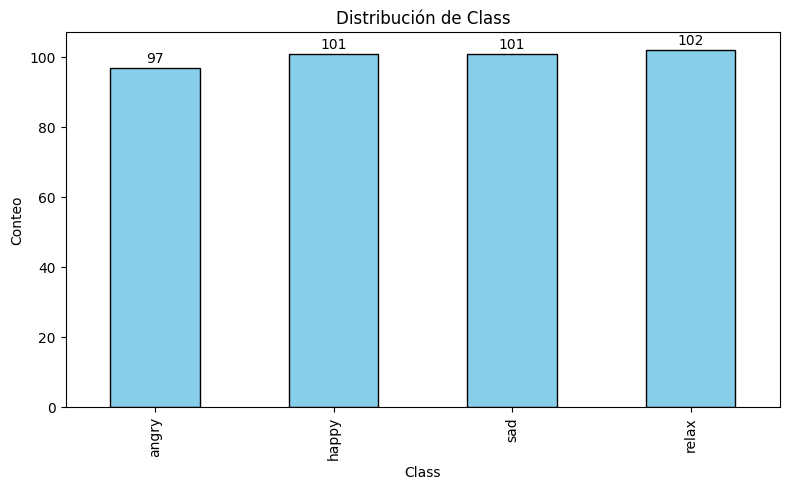

In [40]:
plot_counts(df_clean, "Class", ascending=True)

### Imputación de valores nulos

In [41]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
_RMSenergy_Mean,391.0,3.384156,48.244815,0.010,0.08500,0.1290,0.17650,873.096
_Lowenergy_Mean,397.0,4.306869,51.157993,0.302,0.52300,0.5540,0.58500,805.528
_Fluctuation_Mean,398.0,9.781450,32.482600,3.987,5.86775,6.7540,7.84175,483.105
_Tempo_Mean,392.0,153.870395,609.792194,48.284,101.49025,119.1165,147.73575,12177.714
_MFCC_Mean_1,396.0,6.330854,37.398159,0.423,1.95725,2.4230,2.90425,565.490
_MFCC_Mean_2,396.0,7.731732,78.487233,-43.608,-0.26950,0.0595,0.42000,946.483
_MFCC_Mean_3,389.0,9.184010,75.694587,-0.870,0.28500,0.4820,0.69100,721.726
_MFCC_Mean_4,393.0,2.548300,50.194637,-11.560,-0.12100,0.0490,0.20100,994.982
_MFCC_Mean_5,392.0,5.780663,55.342239,-0.494,0.06275,0.1885,0.30000,683.085
_MFCC_Mean_6,396.0,0.037124,0.206901,-0.916,-0.07825,0.0495,0.15350,0.799


- Varias variables (como _Chromagram_Mean_X, _Spectralkurtosis_Mean) muestran skewness > 1, donde la media no representa bien la centralidad, por lo que se decide aplicar la mediana como valor de imputación para valores nulos. Además de que la mediana no se ve afectada por valores extremos.

In [42]:
def replace_outliers_iqr(df: pd.DataFrame, factor: float = 1.5) -> pd.DataFrame:
    """
    Detecta outliers en columnas numéricas usando el método IQR
    y los reemplaza por NaN.

    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.
        factor (float): multiplicador del IQR (1.5 por defecto, 3.0 si quieres ser más tolerante).

    Retorna:
        DataFrame con outliers reemplazados por NaN.
    """
    df_out = df.copy()
    numeric_cols = df_out.select_dtypes(include=["number"]).columns.tolist()

    print("Cantidad de outliers reemplazados por NaN:\n")

    for col in numeric_cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Identificar y reemplazar outliers
        mask_outliers = (df_out[col] < lower_bound) | (df_out[col] > upper_bound)
        n_outliers = mask_outliers.sum()

        if n_outliers > 0:
            print(f"- '{col}': {n_outliers}")
            df_out.loc[mask_outliers, col] = np.nan

    return df_out

In [43]:
df_no_outliers = replace_outliers_iqr(df_clean)

Cantidad de outliers reemplazados por NaN:

- '_RMSenergy_Mean': 6
- '_Lowenergy_Mean': 8
- '_Fluctuation_Mean': 16
- '_Tempo_Mean': 1
- '_MFCC_Mean_1': 21
- '_MFCC_Mean_2': 12
- '_MFCC_Mean_3': 11
- '_MFCC_Mean_4': 14
- '_MFCC_Mean_5': 12
- '_MFCC_Mean_6': 16
- '_MFCC_Mean_7': 12
- '_MFCC_Mean_8': 13
- '_MFCC_Mean_9': 13
- '_MFCC_Mean_10': 12
- '_MFCC_Mean_11': 15
- '_MFCC_Mean_12': 12
- '_MFCC_Mean_13': 15
- '_Roughness_Mean': 17
- '_Roughness_Slope': 14
- '_Zero-crossingrate_Mean': 7
- '_AttackTime_Mean': 40
- '_AttackTime_Slope': 8
- '_Rolloff_Mean': 2
- '_Eventdensity_Mean': 6
- '_Pulseclarity_Mean': 15
- '_Brightness_Mean': 6
- '_Spectralcentroid_Mean': 8
- '_Spectralspread_Mean': 1
- '_Spectralskewness_Mean': 20
- '_Spectralkurtosis_Mean': 38
- '_Spectralflatness_Mean': 12
- '_EntropyofSpectrum_Mean': 19
- '_Chromagram_Mean_1': 3
- '_Chromagram_Mean_2': 19
- '_Chromagram_Mean_3': 5
- '_Chromagram_Mean_4': 23
- '_Chromagram_Mean_5': 12
- '_Chromagram_Mean_7': 21
- '_Chromagram_Me

## **Parte 1**. Manipulación y preparación (Resumen)
En resúmen lo que se ha realizado hasta aquí:
- Convertir variables tipo objeto en numéricas, las que no se pueden convertir se les asigna NaN.
- Limpieza de la variable objetivo "Class", esto es definir sólo 4 clases en total y eliminar los valores nulos.
- Eliminar columnas con tantos vacios que no aportan al modelo según referencias bibliográficas, como la columna "mixed_type_col".
- Eliminar duplicados.
- Detecta outliers en todas las columnas numéricas usando el método IQR, los reemplaza por NaN e imputa usando la mediana.

## **Parte 2**. Exploración y preprocesamiento de los datos

### Preprocesamiento inicial

In [44]:
df = df_no_outliers.copy()

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [46]:
# Separación de X e Y
Y = df["Class"].copy()
X = df.drop(columns=["Class"]).copy()

# Separación en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=23, stratify=Y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=23, stratify=y_temp)

print("Tamaños finales:")
print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)

Tamaños finales:
Train: (280, 50)
Val: (60, 50)
Test: (61, 50)


- Según nuestro análisis anterior, no tenemos tantos valores NaN, por lo tanto, podemos imputar con la mediana, con el objetivo de estár exentos (dentro de lo posible) de valores 'outliers'.

- Es una buena práctica escalar las caracterísiticas para que el modelo no se vea sesgado por los datos. La escala es esencialmente el proceso de acercar todas las características a un rango o escala similar o igual, como transformarlas para que todos los valores estén entre 0 y 1.

Según la siguiente información (When To Use MinMaxScaler Vs StandardScaler | Kaggle, s. f.), vamos a utilizar "standardScaler":

**Standardization:**

* Results in a distribution with 0 mean and 1 standard deviation.
* Many ML algorithms (particularly deep learning algorithms) assume data has a standard normal distribution with 0 mean and unit variance.
* Sensitive to outliers.
* Better for data which is already normally distributed.

**Min-Max Scaling:**

* Restricts value range to [0,1].
* Sensitive to outliers.
* Because it restricts the value range to 0,1, it preserves values of 0 in the case of sparse data.
* Preserves original distribution/shape of the data.

[1] When to use MinMaxScaler vs StandardScaler | Kaggle. (s. f.). https://www.kaggle.com/discussions/questions-and-answers/529881


In [47]:
# Separación de columnas en X
num_cols = X_train.select_dtypes(include=["number"]).columns

# Pipeline para imputar con la mediana
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Combinación final
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols)
    ],
    remainder='passthrough' # deja pasar el resto tal cual (ej. categóricas ya codificadas)
)

In [48]:
# Aplicación del pipeline
X_preprocessed = preprocessor.fit_transform(X_train)

# Obtener los nombres de las features de la salida del ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Reconstruir dataframe con nombres de columnas
X_preprocessed = pd.DataFrame(X_preprocessed, columns=feature_names)

# Renombrar las columnas de X para limpiarlas
X_preprocessed.columns = [col.split('__')[1] for col in X_preprocessed.columns]

# Unir X procesada con Y original
df_preprocessed = pd.concat([X_preprocessed, y_train.reset_index(drop=True)], axis=1)

df_preprocessed

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,Class
0,-0.000588,-0.183638,0.600770,-0.438203,0.972508,1.131477,-0.860464,1.315882,-0.726830,-0.576793,...,1.134997,1.630462,-0.663800,-0.031850,0.143222,-1.276505,-0.020739,-0.160770,0.975549,sad
1,1.860404,-0.940451,0.232013,-0.182033,0.159629,-0.694826,-0.781232,-1.473246,-0.268611,-0.477606,...,-0.772581,-0.204119,1.888178,-0.169048,-0.711415,-0.066261,-0.020739,0.450648,0.975549,happy
2,2.107438,-1.296598,-1.809014,0.738206,-0.135269,0.140724,0.267651,-1.077399,-0.703919,0.743641,...,0.496361,1.733599,-0.526340,1.398934,-0.229312,-0.665508,-1.173895,0.893927,-0.775436,angry
3,-0.329967,-0.628822,-0.061122,0.102295,-0.171940,-1.466593,-0.547308,-0.240206,0.327074,-0.018863,...,-0.097848,1.755477,-0.158784,2.163325,-0.251226,0.168737,1.132417,1.276064,0.275155,happy
4,-0.494657,1.508060,0.856483,1.787672,0.622603,0.753035,-0.600129,0.210241,-0.847112,-1.655457,...,-0.536563,0.345943,-1.052275,-0.012250,0.581498,-1.676003,-0.020739,-0.833331,-1.125633,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.806391,-0.116861,-0.836837,0.937001,1.388116,-1.011612,0.169554,-0.085507,0.183881,-0.428012,...,1.060026,-0.666671,-1.073193,0.614943,0.340446,0.826734,1.132417,0.190795,-1.475830,sad
276,-0.099402,2.353909,-0.319953,-1.352388,0.205468,-0.244097,0.505347,0.856336,1.037314,-0.062258,...,-0.794794,-0.701050,-1.058251,1.144137,1.107429,0.744484,0.620411,-0.328911,-0.775436,relax
277,1.267521,-0.294934,-1.575130,0.017105,0.107678,-0.573639,-0.796323,0.433189,0.550456,1.134191,...,1.134997,-0.547908,-0.992510,-0.561044,-1.193518,1.895978,0.253550,1.459490,-0.075042,angry
278,-1.960394,2.175835,0.586737,1.028646,-0.605883,2.434764,-1.596191,1.279482,2.056852,-1.779441,...,-1.286266,-1.041713,0.151996,1.398934,0.866377,-0.665508,-0.020739,-0.451194,1.325746,sad


Ya tenemos un dataset:

- Dividido en (train, test y val).
- Solo estamos trabajando con train para evitar 'data leakage'.
- Imputamos los valores faltantes con la mediana.
- Escalamos los datos usando StandarScaler, para que el modelo pueda procesar mejor los datos.
- Limpiamos los encabezados.
- Unimos la varible objetivo.
- Tenemos un dataset listo para la exploración.

### Gráficos (1): Distribuciones y box plot

**Distribuciones:**

- En general la mayoria de ellas se encuentran centradas, lo cual es buena señal, de datos bien distribuidos.

- En su mayoría los datos de las columnas 'Chromagram' tienen una ligera tendencia a la izquierda, lo cual es hasta cierto punto 'normal', ya que recordemos que son 'cronogramas musicales', podemos observar en las imágenes, que el sonido más fuerte tiende a ser el principio de la 'nota', después tiende a ir abajo (vease la siguiente imágen). Por lo tanto es normal que tengan esa tendencia a la izquierda.

[Img de referencia](https://upload.wikimedia.org/wikipedia/commons/2/25/ChromaFeatureCmajorScaleScoreAudioColor.png)

- En base al punto anterior, podemos profundizar aún más en el 'Chromagram 5, 8 & 3', cuya distribución no parece tan sesgada a la izquierda, si no que muestran incluso hasta una distribución 'central débil' las preguntas son ¿qué instrumentos representan? ¿Se relaciona más con música alegre o enojada por el sentido que es un sonido fuerte prolongado?


---


**Box plot:**

- Aquí no encontramos excesivas columnas con datos fuera de los normal ('outliers'), en general se muestran datos 'normales'.

- Los únicos que destacan son los mismos que el apartado anterior, los 'cronogramas' y los 'espectrales kurtosis', podemos irnos por el mismo análisis anterior, al ser representaciónes del sonido, es nomal que hayan más datos fuera de lo normal, sobre todo en los datos 'más altos', que representan cuando el sonido se está callando. Véase la siguiente imágen de ejemplo.

[Img de referencia, spectral kurtosis de frecuencia normalizada](https://www.researchgate.net/publication/315582776/figure/fig6/AS:668320332251150@1536351392996/Spectral-Kurtosis-distribution-of-kurtosis-along-frequency-bins.ppm)

Distribución de variables numéricas (Histogramas)


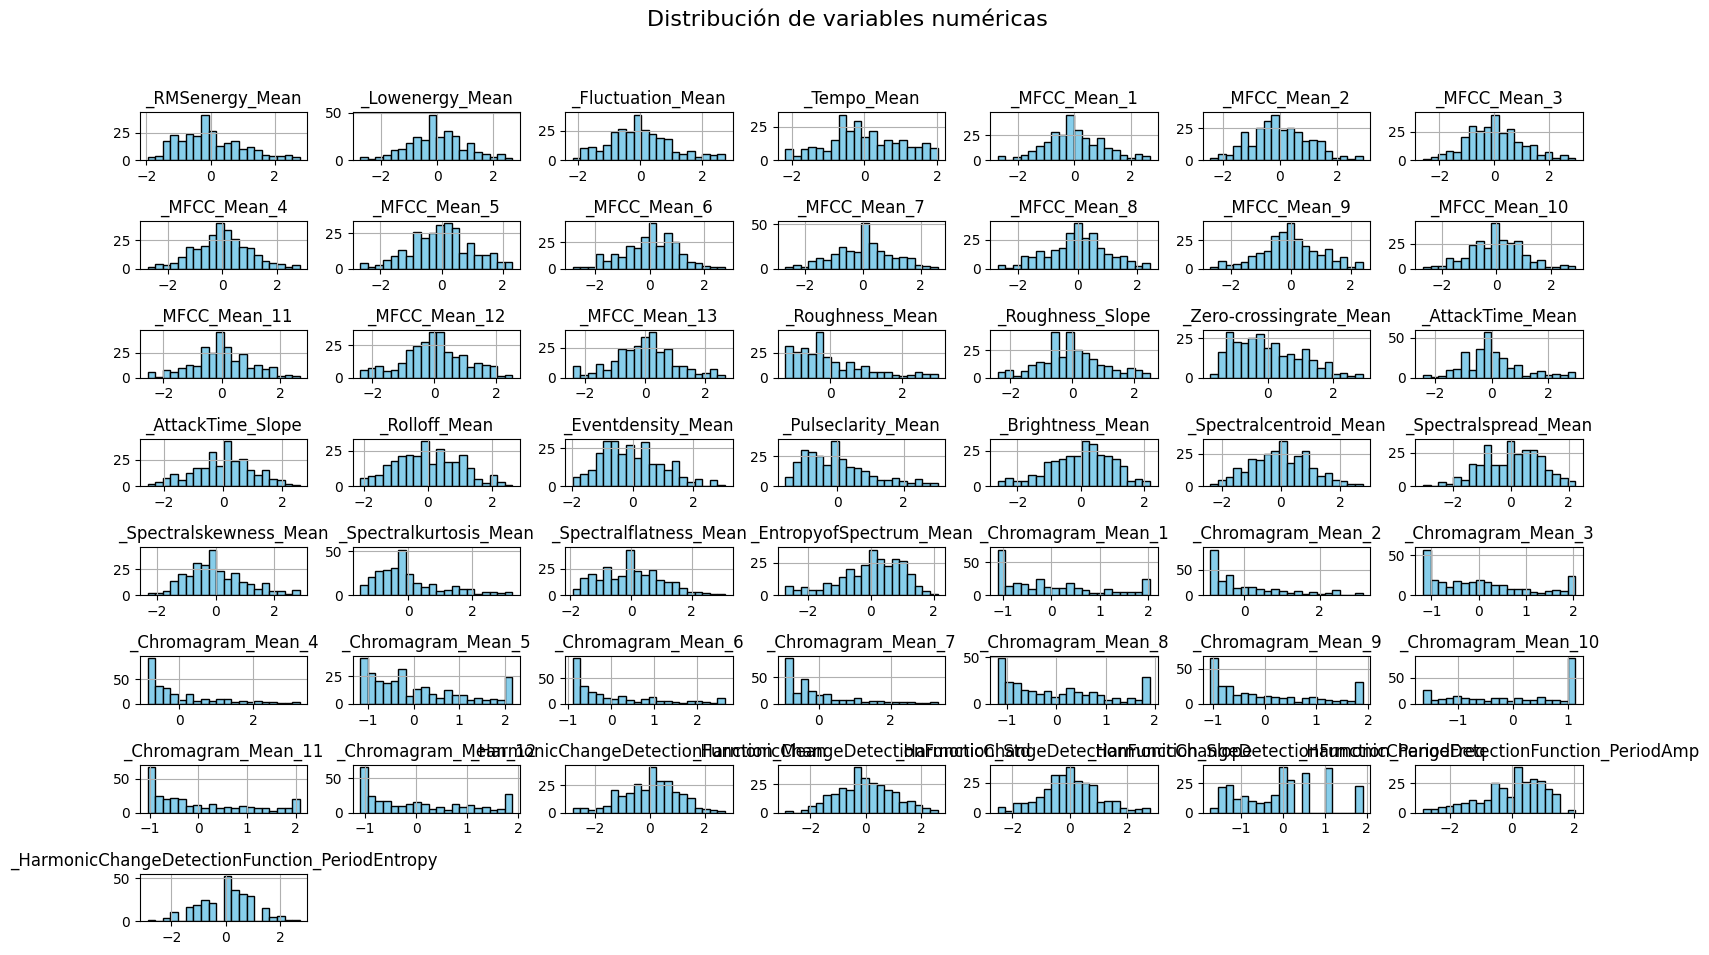


Dispersión y posibles outliers (Boxplots)


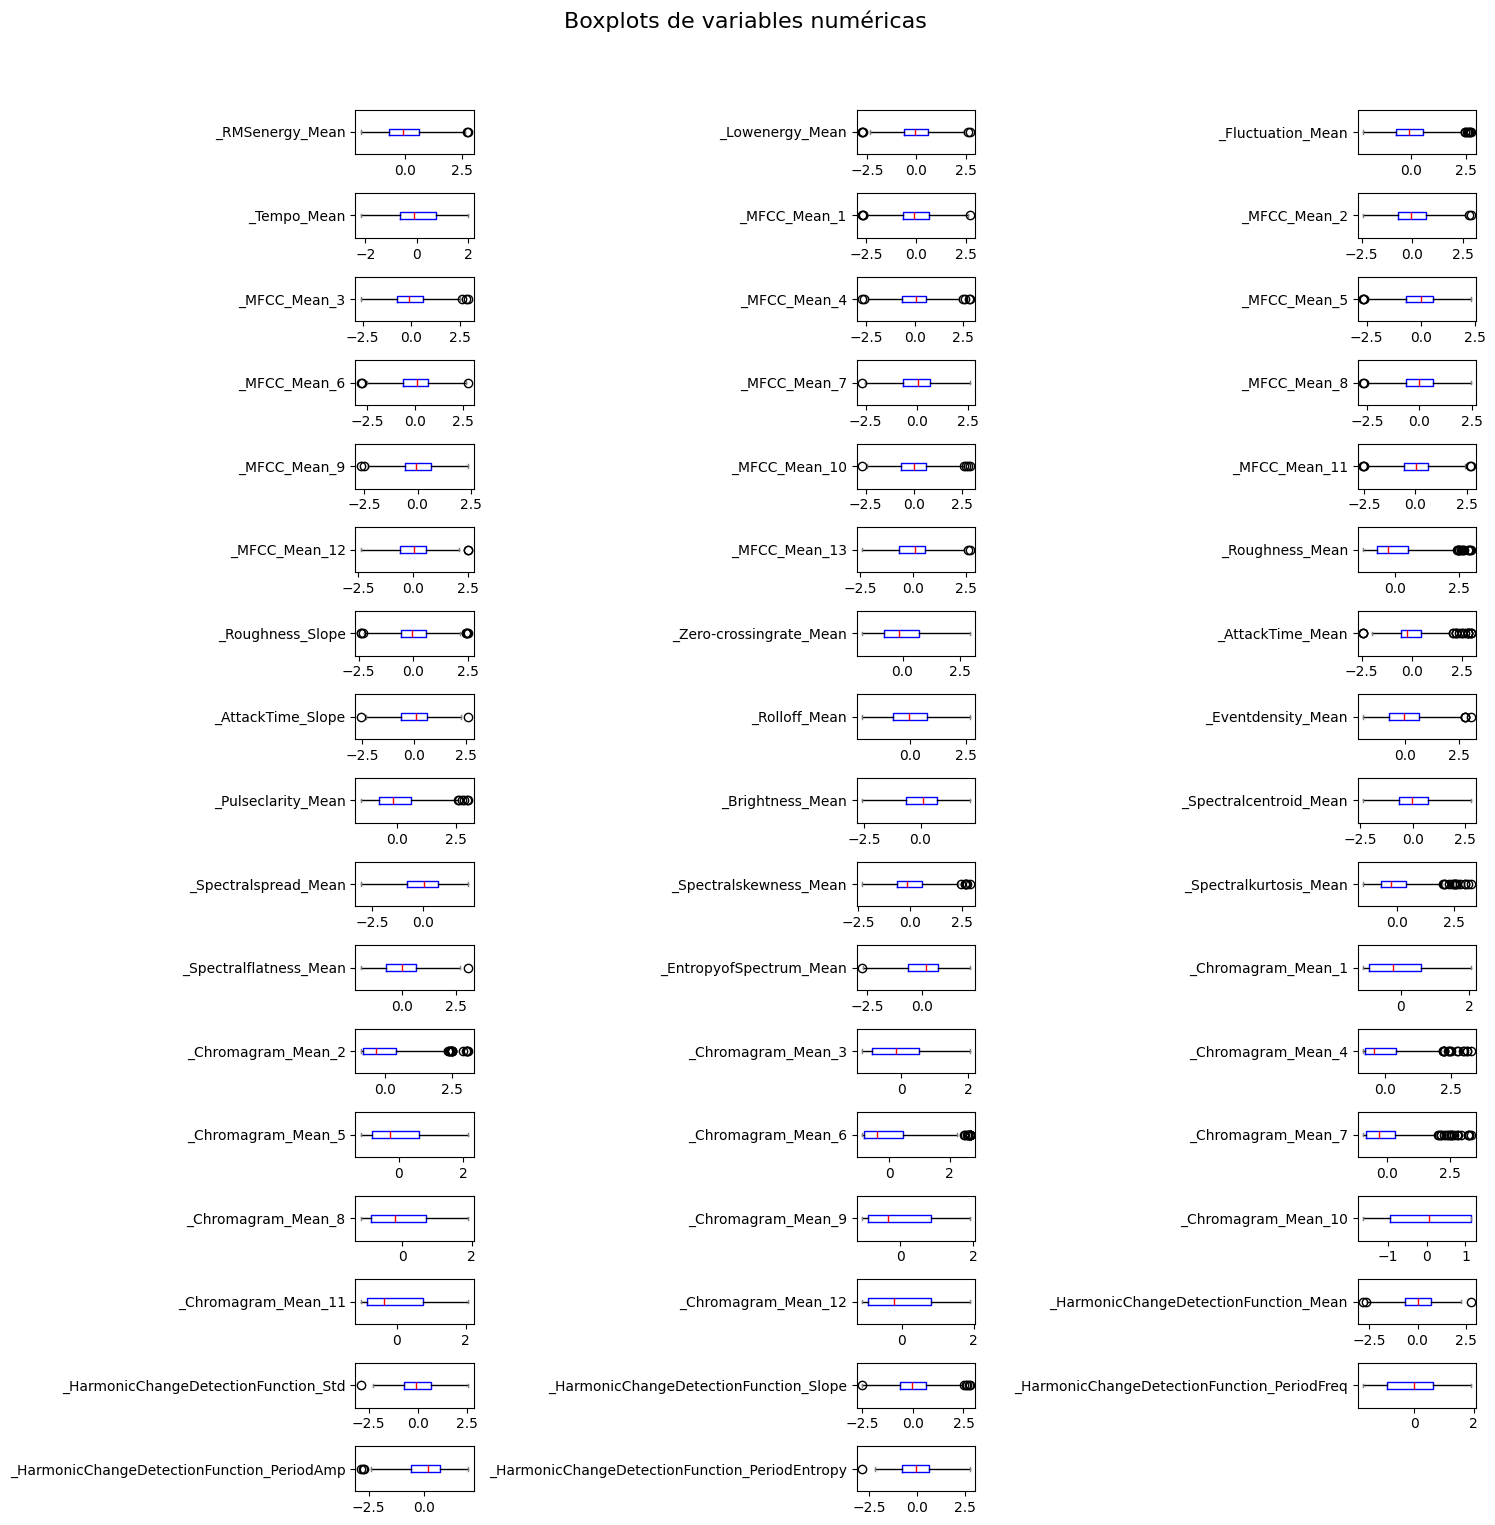

In [49]:
# Revisar de nuevo las distribuciones después de realizar la primera fase de la limpieza
plot_numeric_eda(df_preprocessed, bins=20)

### Gráficos (2): Histograma

In [50]:
df_preprocessed.describe().T

,count,mean,std,min,25%,50%,75%,max
_RMSenergy_Mean,280.0,-8.881784e-17,1.001791,-1.960394,-0.716988,-0.099402,0.621115,2.782665
_Lowenergy_Mean,280.0,-3.552714e-16,1.001791,-2.743445,-0.628822,-0.050083,0.600998,2.687797
_Fluctuation_Mean,280.0,-1.490871e-16,1.001791,-2.165298,-0.654017,-0.061122,0.551264,2.725995
_Tempo_Mean,280.0,-2.188725e-16,1.001791,-2.173929,-0.658403,-0.103498,0.761024,2.016797
_MFCC_Mean_1,280.0,-5.582836e-16,1.001791,-2.702256,-0.670058,-0.072622,0.652017,2.693001
_MFCC_Mean_2,280.0,1.903239e-17,1.001791,-2.423329,-0.698015,-0.059128,0.671712,2.889746
_MFCC_Mean_3,280.0,1.903239e-17,1.001791,-2.596025,-0.737842,-0.098326,0.577034,2.935133
_MFCC_Mean_4,280.0,9.516197e-18,1.001791,-2.729036,-0.648565,0.041892,0.584475,2.835570
_MFCC_Mean_5,280.0,-6.344132e-18,1.001791,-2.662806,-0.688167,0.040687,0.563344,2.320328
_MFCC_Mean_6,280.0,-3.965082e-17,1.001791,-2.820910,-0.634136,0.111320,0.678549,2.764586


In [51]:
# Forma (asimetría)
df_preprocessed.skew(numeric_only=True).sort_values(ascending=False)

,0
_Chromagram_Mean_7,1.408916
_Chromagram_Mean_4,1.374750
_Chromagram_Mean_2,1.295649
_Chromagram_Mean_6,1.205185
_Roughness_Mean,1.137850
_Spectralkurtosis_Mean,1.136732
_Pulseclarity_Mean,0.948756
_Chromagram_Mean_5,0.840726
_AttackTime_Mean,0.808465
_Chromagram_Mean_11,0.791615


- Las 6 primeras presentan cola derecha larga, incluso después de eliminar outliers, lo que sugiere distribuciones sesgadas hacia valores bajos y pocos valores altos.

- Considerar transformaciones logarítmicas o Box–Cox teniendo en cuenta que tienen valores positivos. Esto estabiliza la varianza y reduce la asimetría.

In [52]:
# Forma (curtosis)
df_preprocessed.kurt(numeric_only=True).sort_values(ascending=False)

,0
_Chromagram_Mean_7,1.372949
_AttackTime_Mean,1.039346
_Chromagram_Mean_4,1.038897
_Chromagram_Mean_2,0.904324
_Spectralkurtosis_Mean,0.833714
_Roughness_Mean,0.709097
_Chromagram_Mean_6,0.447740
_Pulseclarity_Mean,0.409456
_MFCC_Mean_10,0.299152
_HarmonicChangeDetectionFunction_Slope,0.277191


- Casi todas las variables están entre -1.4 y +1.3, lo cual indica distribuciones relativamente planas o normales. Muy pocas con curtosis positiva significativa (_Chromagram_Mean_7 = 0.95, _Spectralkurtosis_Mean = 0.79).
- Esto confirma que la eliminación de outliers fue efectiva, ya que las colas extremas (que elevan la curtosis) se redujeron.

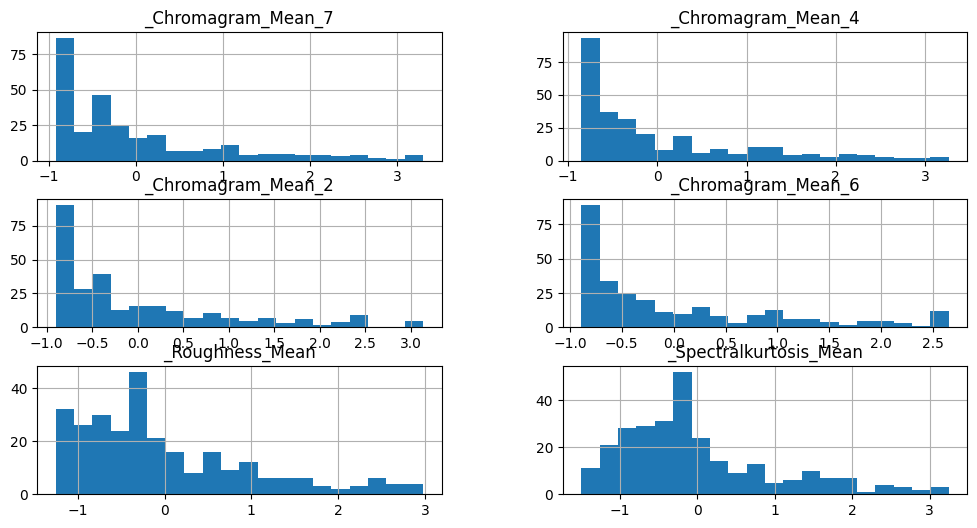

In [53]:
cols_skewed = df_preprocessed.skew(numeric_only=True).sort_values(ascending=False).head(6).index
df_preprocessed[cols_skewed].hist(figsize=(12,6), bins=20)
plt.show()

In [54]:
for i in cols_skewed:
    print(f"{i}: {df_preprocessed[df_preprocessed[i] == 0].shape[0]}")

_Chromagram_Mean_7: 0
_Chromagram_Mean_4: 0
_Chromagram_Mean_2: 0
_Chromagram_Mean_6: 0
_Roughness_Mean: 0
_Spectralkurtosis_Mean: 0


- Teniendo en cuenta la alta asimetría con muchos ceros (o valores pequeños positivos) para los características anteriores y que también existen características sin valores en 0. Se aplicará una transformación que se adapta automáticamente según la distribución, soporta ceros y negativos. Esto es PowerTransformer(method="yeo-johnson") de scikit-learn.

In [55]:
df_preprocessed.isna().sum().mul(100).div(len(df_preprocessed)).sort_values(ascending=False)

,0
_RMSenergy_Mean,0.0
_Lowenergy_Mean,0.0
_Fluctuation_Mean,0.0
_Tempo_Mean,0.0
_MFCC_Mean_1,0.0
_MFCC_Mean_2,0.0
_MFCC_Mean_3,0.0
_MFCC_Mean_4,0.0
_MFCC_Mean_5,0.0
_MFCC_Mean_6,0.0


In [56]:
n_duplicates = df_preprocessed.duplicated().sum()

if n_duplicates > 0:
    print(f"Se encontraron {n_duplicates} filas duplicadas. Serán eliminadas.")
    df_preprocessed = df_preprocessed.drop_duplicates()
    print(f"Después de eliminar, el DataFrame tiene {len(df_preprocessed)} filas.")
else:
    print("No se encontraron filas duplicadas.")

No se encontraron filas duplicadas.


### "Intento" de comparación con el conjunto de datos original -> Esto no lo piden.

In [59]:
df_original = pd.read_csv("/content/drive/MyDrive/OPS con ML/turkis_music_emotion_original.csv")
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [60]:
# # Asegurar que columnas están en el mismo orden y tipos
# common_cols = df_original.columns.intersection(df_preprocessed.columns)
# df_orig_aligned = df_original[common_cols].copy()
# df_prep_aligned = df_preprocessed[common_cols].copy()

# # Convertir filas en tuplas para comparar fácilmente
# orig_set = set([tuple(row) for row in df_orig_aligned.itertuples(index=False)])
# prep_set = set([tuple(row) for row in df_prep_aligned.itertuples(index=False)])

# # Intersección (filas idénticas)
# common_rows = orig_set.intersection(prep_set)

# # Porcentaje de coincidencia
# pct_match = len(common_rows) / len(df_prep_aligned) * 100

# print(f"✅ Coincidencia exacta de filas: {pct_match:.2f}%")
# print(f" - Filas totales en df_preprocessed: {len(df_prep_aligned)}")
# print(f" - Filas encontradas en df_original: {len(common_rows)}")

In [61]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Solo columnas numéricas
num_cols = df_original.select_dtypes(include=["number"]).columns.intersection(df_preprocessed.columns)
A = df_original[num_cols].to_numpy()
B = df_preprocessed[num_cols].to_numpy()

# Redimensionar (por si tienen diferente número de filas)
min_rows = min(A.shape[0], B.shape[0])
A, B = A[:min_rows], B[:min_rows]

# Similitud coseno promedio fila a fila
similarities = [cosine_similarity(A[i].reshape(1, -1), B[i].reshape(1, -1))[0,0] for i in range(min_rows)]
avg_similarity = np.mean(similarities)

print(f"🔹 Similitud promedio (cosine): {avg_similarity:.3f}")

🔹 Similitud promedio (cosine): 0.006


- Esto indica que las distribuciones numéricas permanecieron casi idénticas a las originales, lo cual es una señal de que la imputación fue suave y coherente.

## **Parte 2**. Análisis de correlación (bivariante y multivariante)

In [62]:
# sns.clustermap(
#     df_preprocessed.drop(columns=["Class"]).corr(),
#     cmap="coolwarm",
#     figsize=(14, 12),
#     center=0
# )
# plt.suptitle("Cluster de correlaciones entre variables", y=1.02)
# plt.show()

In [63]:
# Calcular la matriz de correlación sin la columna 'Class'
corr_matrix = df_preprocessed.drop(columns=["Class"]).corr()

# Filtrar la mitad superior de la matriz (para no repetir pares)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_upper = corr_matrix.where(~mask)

# Convertir a formato largo (tidy)
high_corr_df = (
    corr_upper.stack()
    .reset_index()
    .rename(columns={'level_0': 'Variable_1', 'level_1': 'Variable_2', 0: 'Correlation'})
)

# Filtrar correlaciones absolutas mayores o iguales a 0.7
threshold = 0.7
high_corr_df = high_corr_df.loc[high_corr_df['Correlation'].abs() >= threshold]

# Ordenar por magnitud de correlación
high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

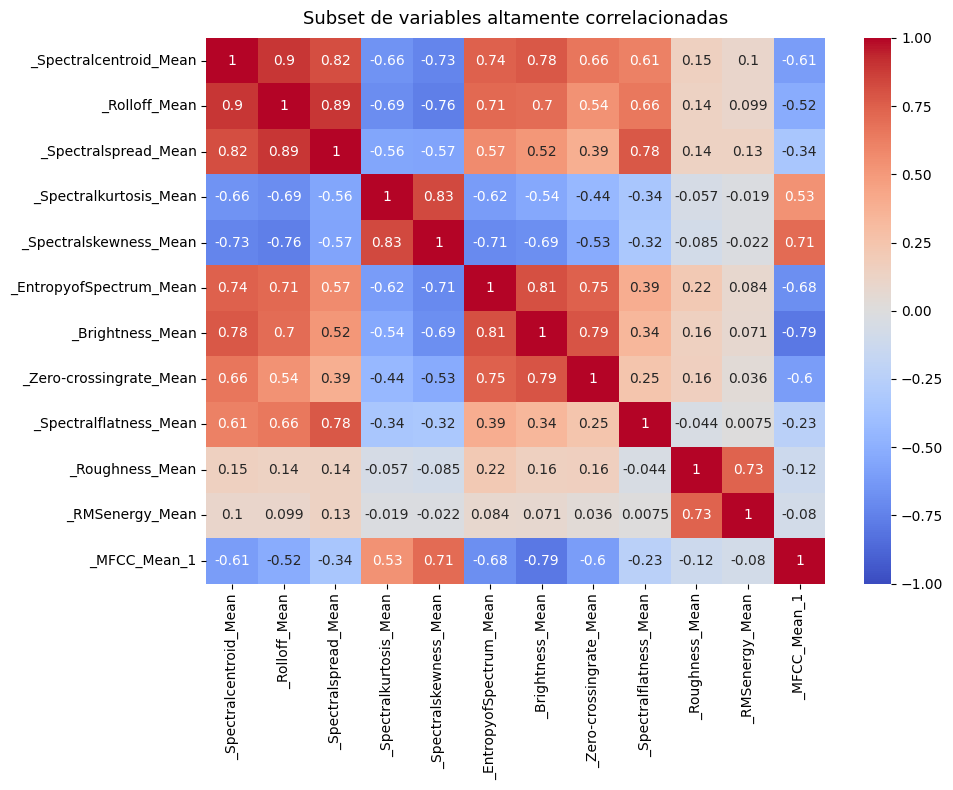

In [64]:
# Conjunto único de todas las variables implicadas
high_corr_vars = pd.unique(
    high_corr_df[['Variable_1', 'Variable_2']].values.ravel()
)

# Submatriz de correlación sólo con esas variables
subset_corr = df_preprocessed[high_corr_vars].corr()

# Gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(
    subset_corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
)
plt.title("Subset de variables altamente correlacionadas", fontsize=13, pad=10)
plt.tight_layout()
plt.show()

- Hay varias variables midiendo la forma del espectro, por eso se correlacionan tanto.

In [65]:
def plot_boxplots_by_class(df, target_col="Class", n_cols=3, max_plots=9):
    """
    Genera boxplots de todas las columnas numéricas respecto a una variable categórica.
    Compatible con seaborn >= 0.13.2
    """
    # Selecciona columnas numéricas
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    n_rows = (max_plots + n_cols - 1) // n_cols

    for i in range(0, len(num_cols), max_plots):
        subset_cols = num_cols[i:i+max_plots]
        fig, axes = plt.subplots(
            nrows=n_rows,
            ncols=n_cols,
            figsize=(6*n_cols, 4*n_rows)
        )
        axes = axes.flatten()

        for ax, col in zip(axes, subset_cols):
            sns.boxplot(
                data=df,
                x=target_col,
                y=col,
                hue=target_col,        # Agregado para compatibilidad
                palette="Set2",
                legend=False,          # Evita mostrar leyenda redundante
                ax=ax
            )
            ax.set_title(col, fontsize=11)
            ax.set_xlabel("")
            ax.set_ylabel("")
            ax.tick_params(axis='x', rotation=30)

        # Oculta ejes vacíos
        for ax in axes[len(subset_cols):]:
            ax.set_visible(False)

        plt.tight_layout()
        plt.show()

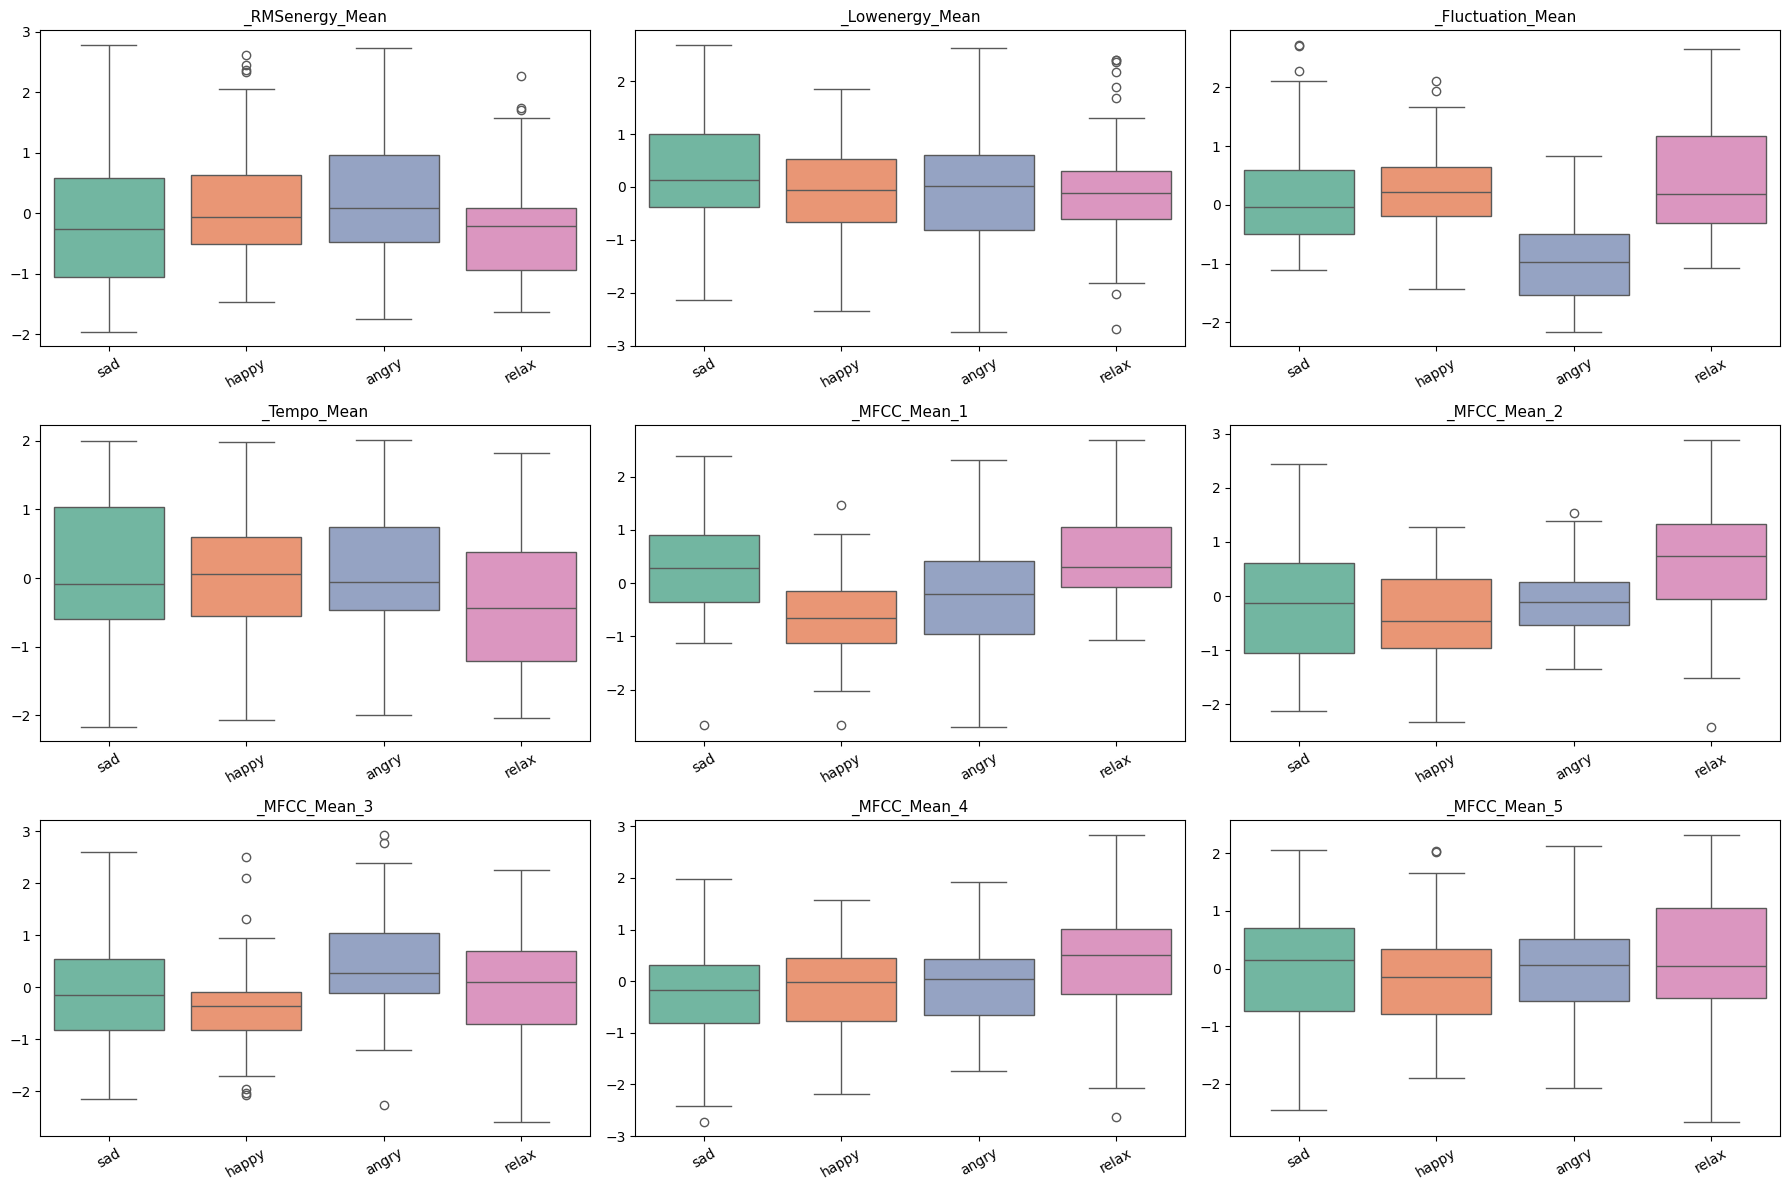

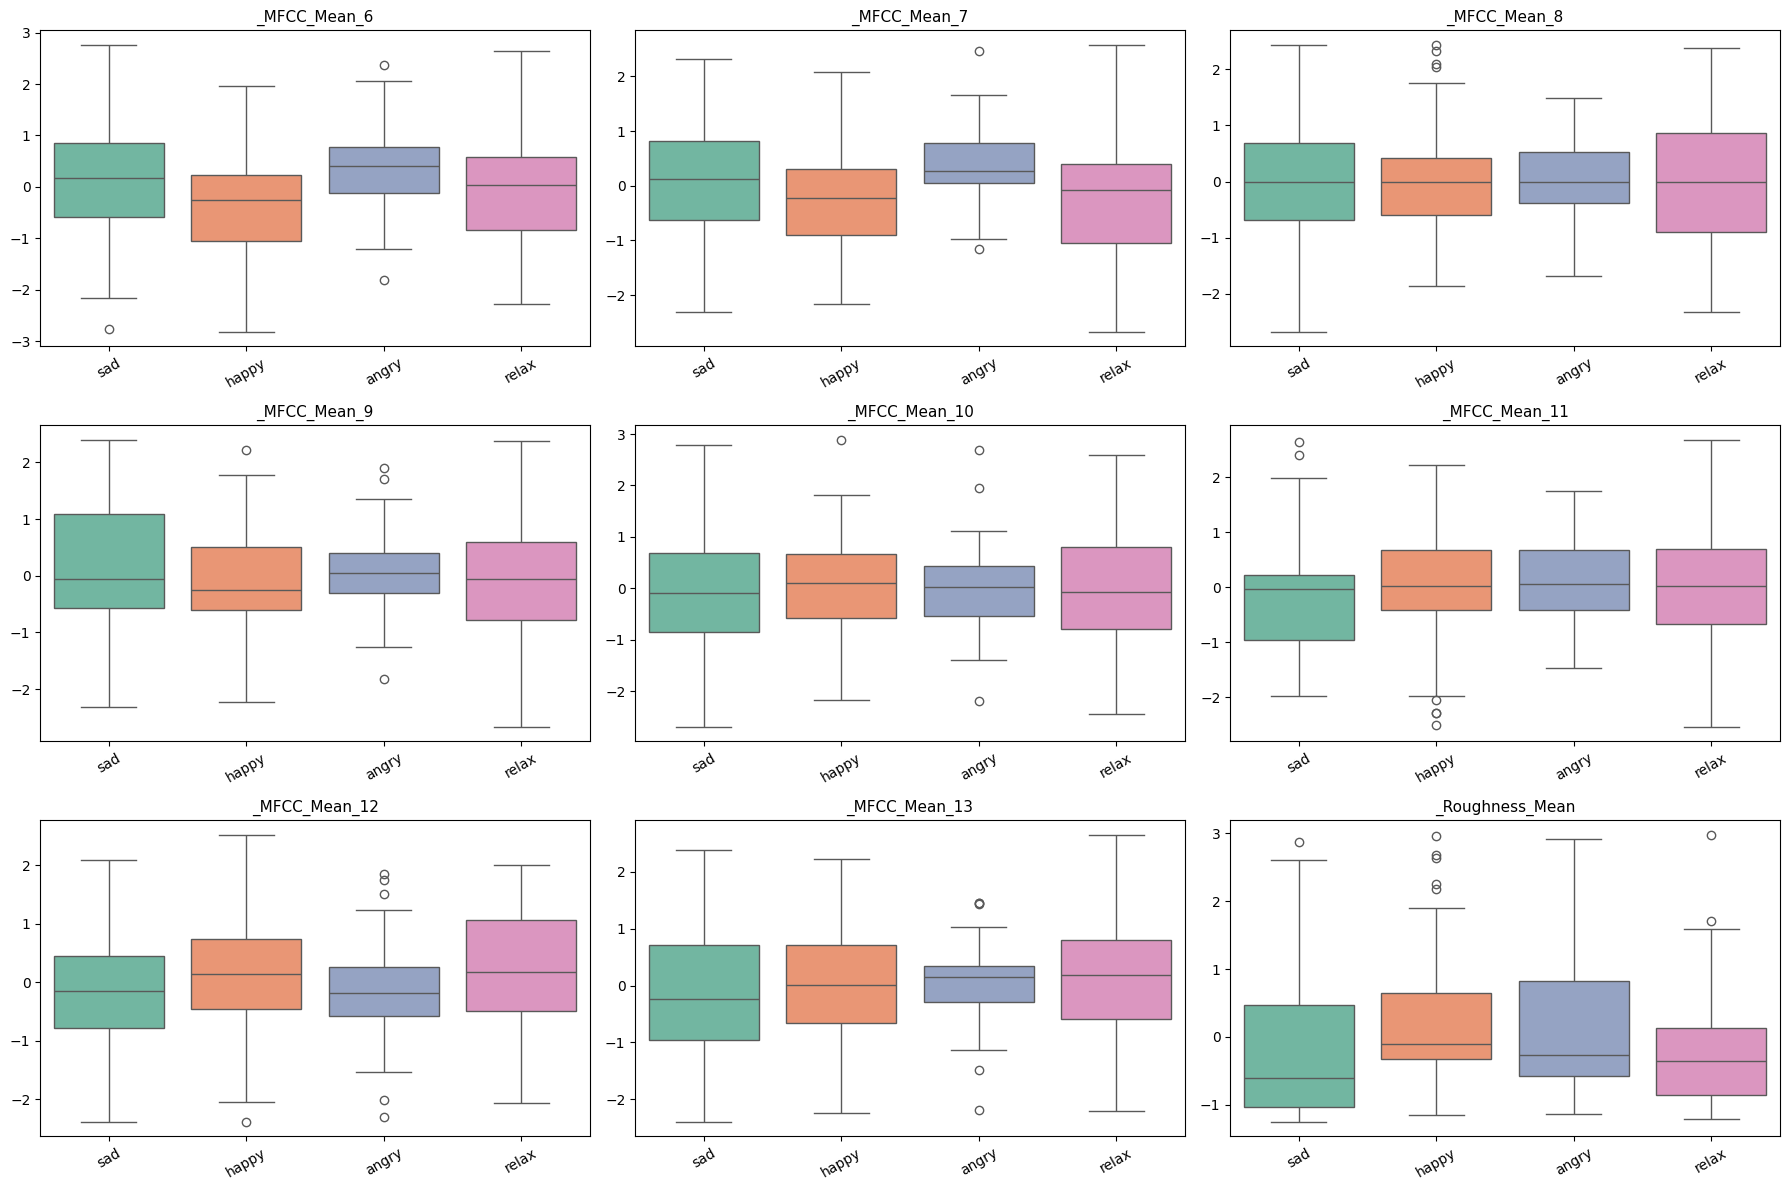

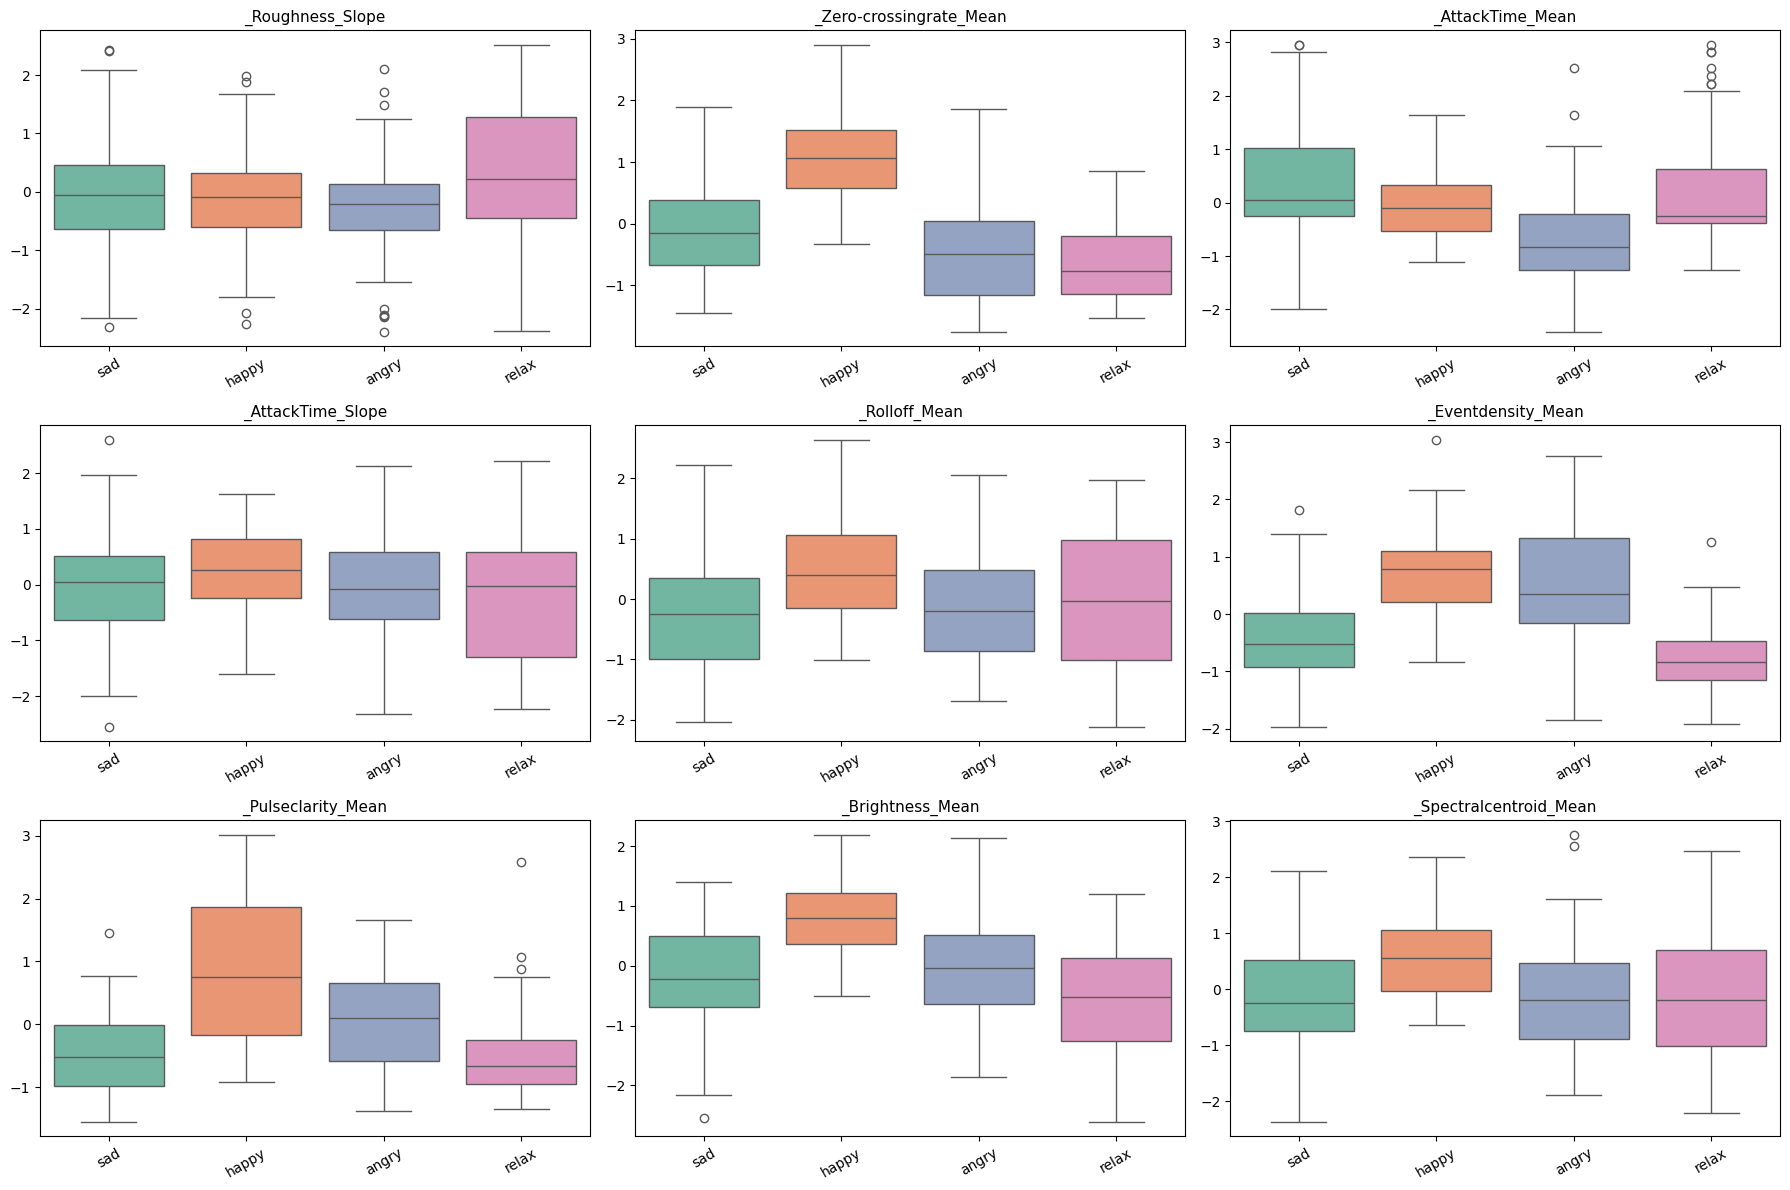

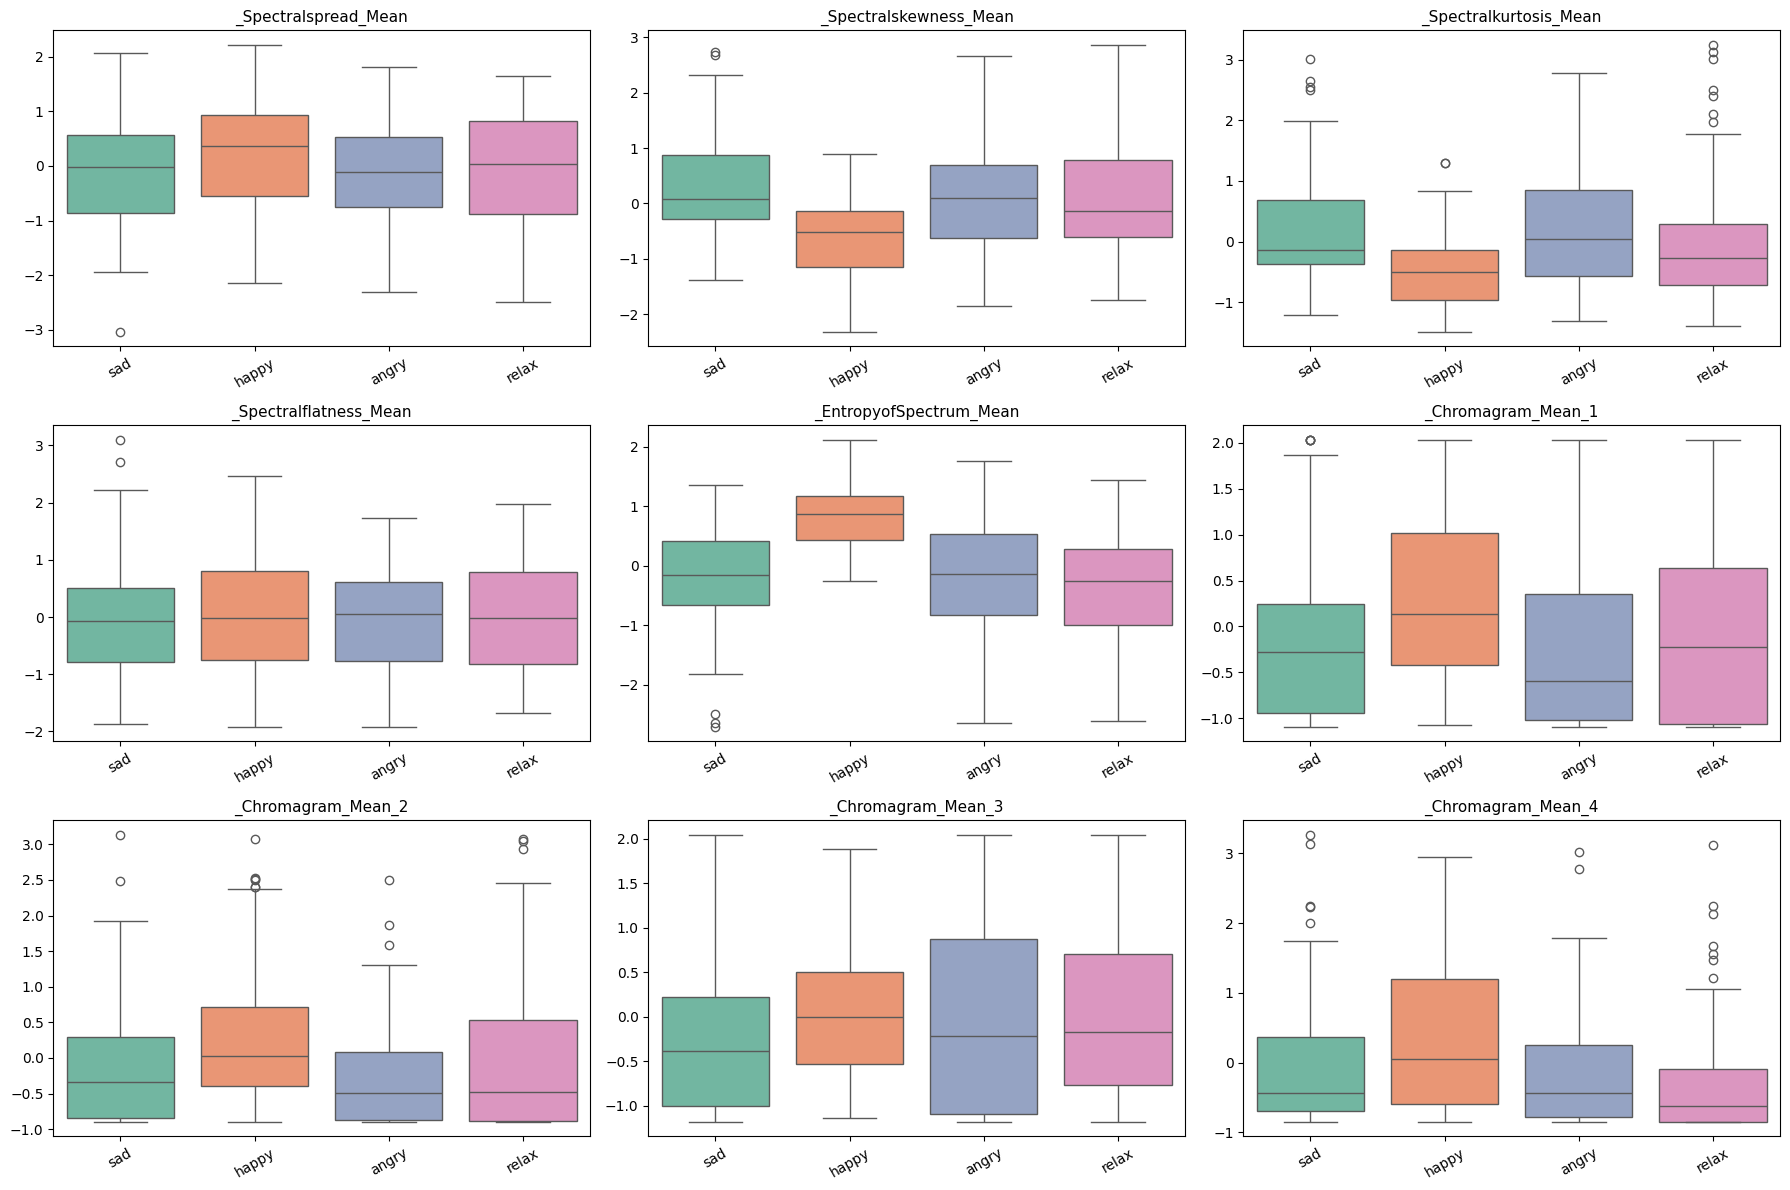

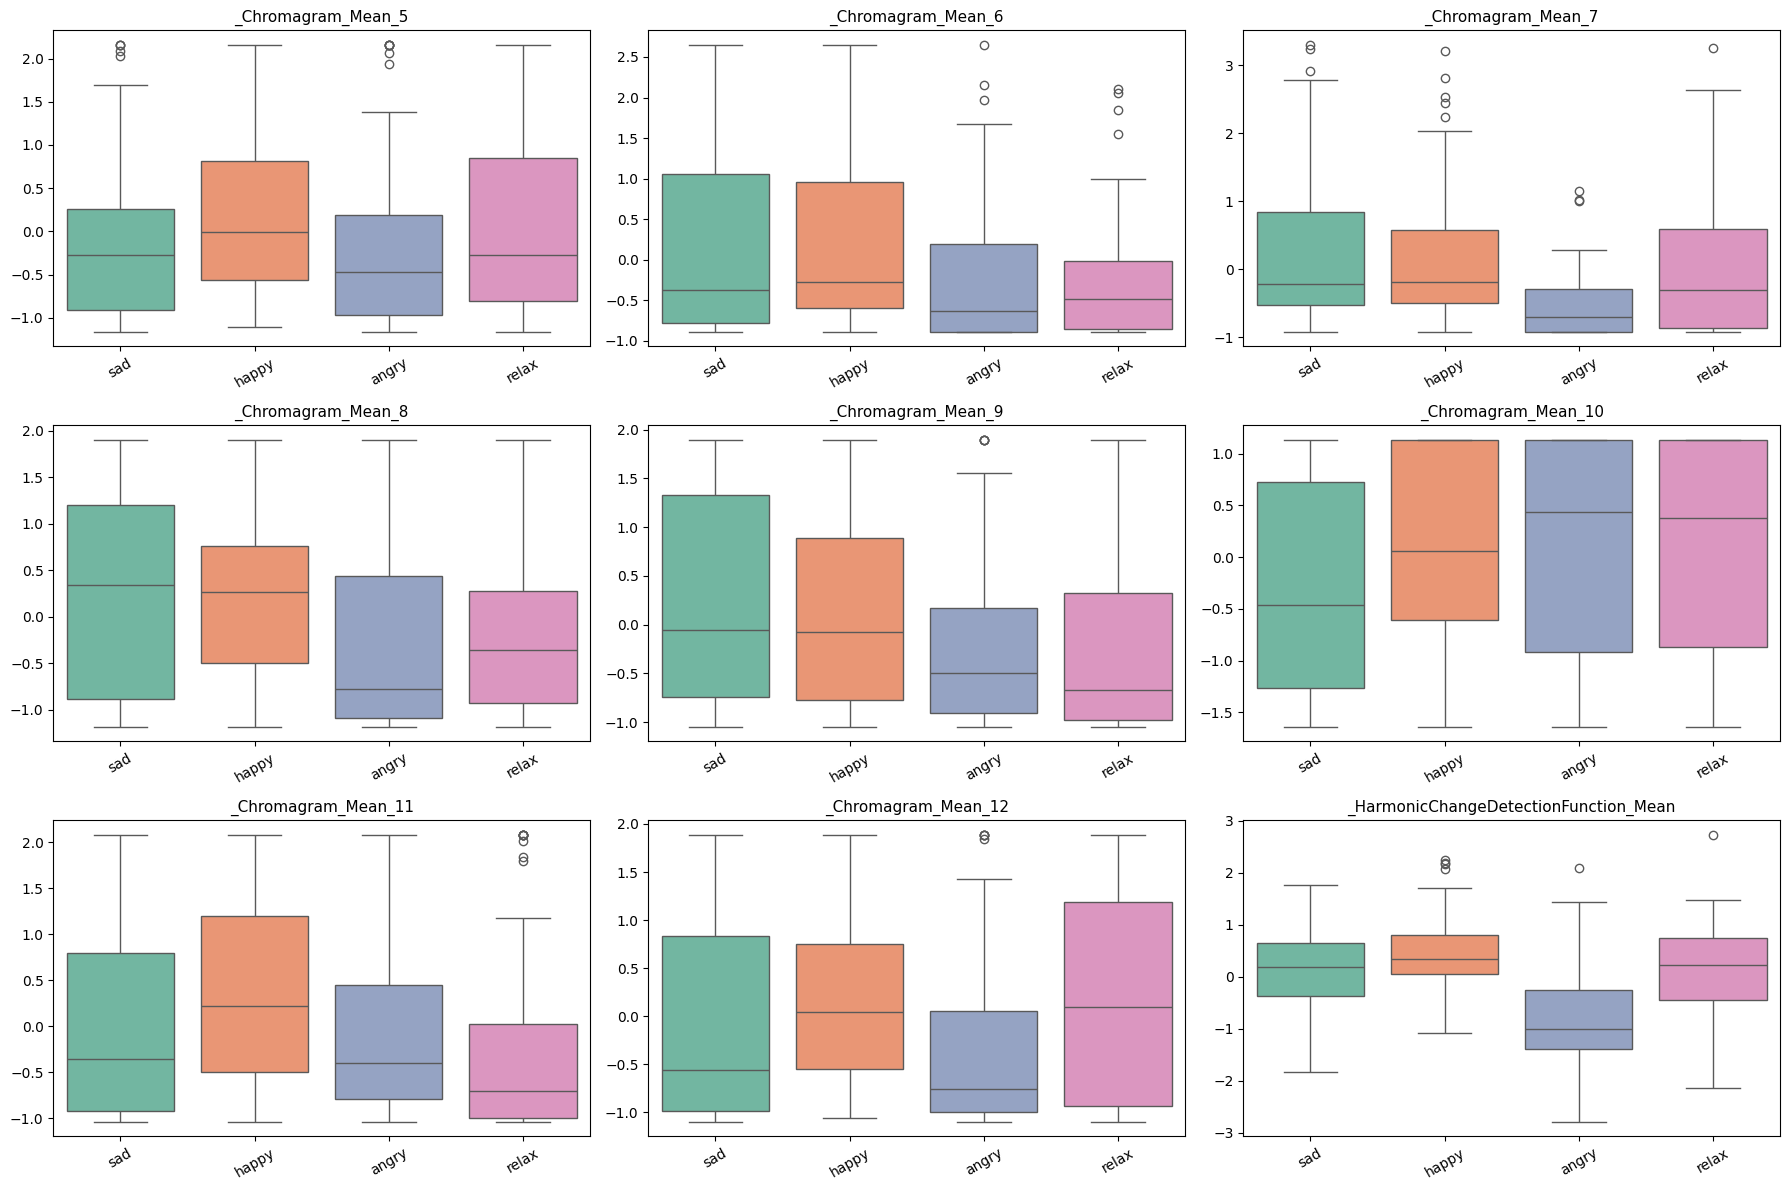

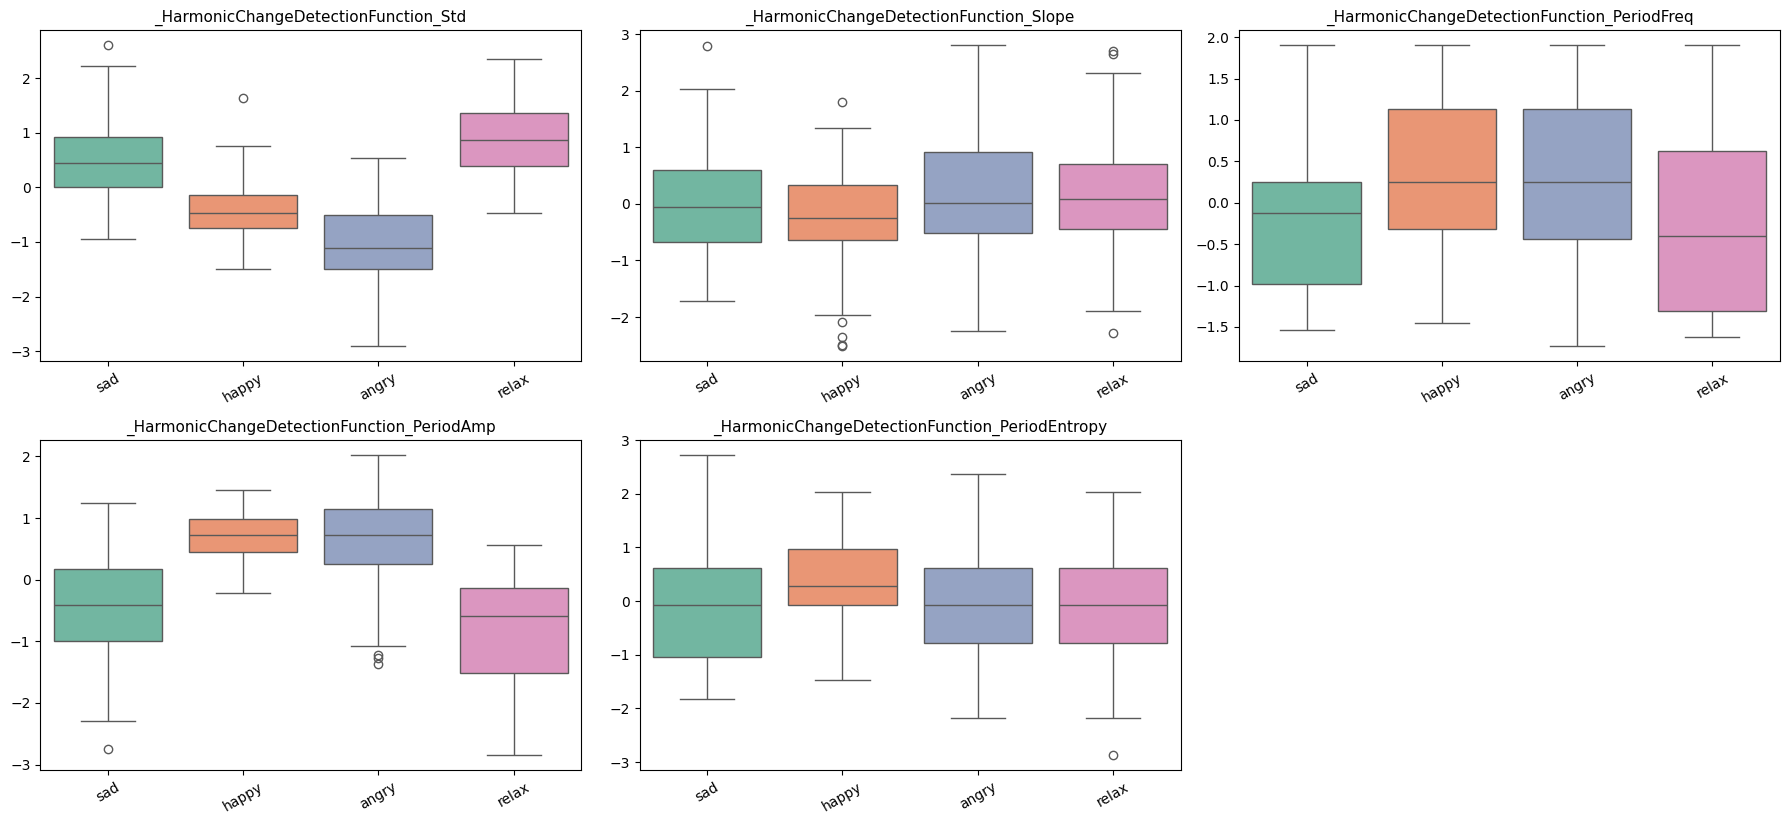

In [66]:
plot_boxplots_by_class(df_preprocessed, target_col="Class", n_cols=3, max_plots=9)

In [67]:
# from sklearn.decomposition import PCA
# import seaborn as sns
# import matplotlib.pyplot as plt

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(df_preprocessed.drop(columns=["Class"]))
# df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
# df_pca["Class"] = df_preprocessed["Class"]

# sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Class", palette="Set2")
# plt.title("Proyección PCA de variables numéricas")
# plt.show()

## **Parte 3**. Preprocesamiento

In [68]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [69]:
# Separar features y target
X = df_preprocessed.drop(columns=["Class"])
y = df_preprocessed["Class"]

# Identificar columnas numéricas
numeric_features = X.select_dtypes(include=["number"]).columns.tolist()

# Pipeline para variables numéricas
numeric_transformer = Pipeline(steps=[
    ("power", PowerTransformer(method="yeo-johnson")),
    ("scaler", StandardScaler())
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)

# Aplicar codificación a la variable objetivo (Class)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Aplicar pipeline de preprocesamiento
X_preprocessed = preprocessor.fit_transform(X)

# Convertir a DataFrame
X_preprocessed = pd.DataFrame(
    X_preprocessed,
    columns=numeric_features
)

print("Transformaciones completadas.")
print(f"X_preprocessed shape: {X_preprocessed.shape}")
print(f"Clases codificadas: {list(label_encoder.classes_)}")

Transformaciones completadas.
X_preprocessed shape: (280, 50)
Clases codificadas: ['angry', 'happy', 'relax', 'sad']


En resúmen lo que se ha realizado hasta aquí:
- Convertir variables tipo objeto en numéricas, las que no se pueden convertir se les asigna NaN.
- Limpieza de la variable objetivo "Class", esto es definir sólo 4 clases en total y eliminar los valores nulos.
- Eliminar columnas con tantos vacios que no aportan al modelo según referencias bibliográficas, como la columna "mixed_type_col".
- Eliminar duplicados.
- Detecta outliers en todas las columnas numéricas usando el método IQR, los reemplaza por NaN e imputa usando la mediana.
- Transformación de forma usando yeo-johnson y de escala con StandardScaler().

Sigue:
- Reducción dimencionalidad (por ejemplo PCA)

# **Tarea 5**. Construcción, ajuste y evaluación de Modelos de Machine Learning

- Split X_train, X_test, Y_train, Y_test
- Construcción, ajuste y evaluación de Modelos de Machine Learning

In [72]:
# Separar conjuntos de entrenamiento, validacion  y prueba
from sklearn.model_selection import train_test_split
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=.25, shuffle=True, random_state=1)

print('Tamaño del conjunto de entrenamiento:', X_train.shape)
print('Tamaño del conjunto de validación:', X_val.shape)
print('Tamaño del conjunto de prueba', X_test.shape)

Tamaño del conjunto de entrenamiento: (168, 50)
Tamaño del conjunto de validación: (56, 50)
Tamaño del conjunto de prueba (56, 50)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Mejores hiperparámetros: {'modelo__C': 0.1, 'modelo__class_weight': None, 'modelo__fit_intercept': False}
📊 Mejor F1 macro: 0.7429960652602334

=== Reporte de Clasificación ===
              precision    recall  f1-score   support

       angry       0.97      0.97      0.97        68
       happy       0.87      1.00      0.93        71
       relax       0.84      0.89      0.86        71
         sad       0.91      0.71      0.80        70

    accuracy                           0.89       280
   macro avg       0.90      0.89      0.89       280
weighted avg       0.90      0.89      0.89       280



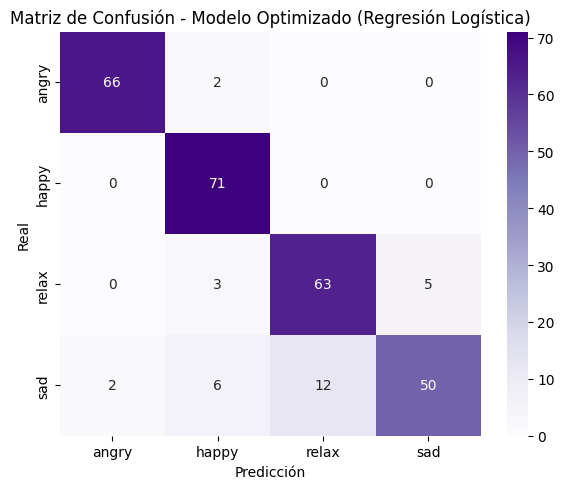

In [75]:
# =========================================
# Modelo 1: Logistic Regression
# =========================================

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ===========================
# Separación de variables
# ===========================
X = df_preprocessed.drop(columns=['Class'])
y = df_preprocessed['Class']

# Identificación de columnas
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include='object').columns

# ===========================
# Preprocesamiento por tipo
# ===========================
preprocesador = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputacion', SimpleImputer(strategy='mean')),
        ('escalado', StandardScaler())
    ]), num_cols),
    ('cat', Pipeline([
        ('imputacion', SimpleImputer(strategy='most_frequent')),
        ('codificacion', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

# ===========================
# Modelo base
# ===========================
modelo = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=1
)

# ===========================
# Pipeline completo
# ===========================
pipeline = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('modelo', modelo)
])

# ===========================
# Grid de hiperparámetros
# ===========================
param_grid = {
    'modelo__C': [0.01, 0.1, 1, 10],
    'modelo__class_weight': [None, 'balanced'],
    'modelo__fit_intercept': [True, False]
}

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# ===========================
# Búsqueda de hiperparámetros
# ===========================
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Entrenamiento
grid_search.fit(X, y)

# ===========================
# Resultados
# ===========================
print("✅ Mejores hiperparámetros:", grid_search.best_params_)
print("📊 Mejor F1 macro:", grid_search.best_score_)

# Predicciones
y_pred = grid_search.predict(X)

# Reporte de clasificación
print("\n=== Reporte de Clasificación ===")
print(classification_report(y, y_pred))

# ===========================
# Matriz de confusión
# ===========================
classes = grid_search.best_estimator_.named_steps['modelo'].classes_

cm = confusion_matrix(y, y_pred, labels=classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Modelo Optimizado (Regresión Logística)')
plt.tight_layout()
plt.show()


## 📊 Análisis y Conclusiones del Modelo de Regresión Logística Optimizado

### 🧠 Desempeño General
El modelo de **Regresión Logística multinomial** alcanzó un **accuracy del 89%** y un **F1-score macro promedio de 0.89**, lo cual indica un excelente equilibrio entre precisión y capacidad de detección en todas las clases.  
El modelo demuestra un comportamiento estable y generaliza correctamente las características de las emociones evaluadas.

---

### 📈 Desempeño por Clase

| Clase | Precisión | Recall | F1-score | Interpretación |
|:------|:-----------:|:--------:|:-----------:|:----------------|
| **angry** | 0.97 | 0.97 | 0.97 | El modelo distingue casi perfectamente esta emoción, con una mínima tasa de error. |
| **happy** | 0.87 | 1.00 | 0.93 | Identifica todas las instancias de “happy” correctamente; pocos falsos positivos reducen ligeramente la precisión. |
| **relax** | 0.84 | 0.89 | 0.86 | Buen desempeño general, aunque se confunde ocasionalmente con la clase “sad”. |
| **sad** | 0.91 | 0.71 | 0.80 | Presenta más errores; tiende a confundirse con “relax” y en menor medida con “happy”. |

📌 En general, el modelo maneja bien las emociones más definidas (*angry* y *happy*), pero tiene cierta dificultad para separar estados similares como *sad* y *relax*, lo cual es esperable en contextos donde las fronteras entre emociones son difusas.

---

### 🔍 Interpretación de la Matriz de Confusión
- La mayoría de las predicciones se ubican correctamente en la diagonal principal, confirmando una **alta tasa de aciertos**.  
- Los errores principales se concentran entre “sad” y “relax”, lo que sugiere que el modelo podría beneficiarse de más ejemplos o de variables adicionales que mejoren la diferenciación entre ambas clases.

---

### ⚙️ Aspectos Técnicos Clave
- El uso de un **pipeline** con imputación, codificación y escalado asegura consistencia en el preprocesamiento.  
- La optimización de hiperparámetros mediante **GridSearchCV** permitió identificar la mejor combinación de regularización y pesos de clase.  
- La **validación cruzada estratificada (StratifiedKFold)** proporcionó una evaluación robusta del modelo.

---

### 🧩 Conclusión General
El modelo de **Regresión Logística optimizado** demuestra un rendimiento **alto y confiable (F1 ≈ 0.89)** en la clasificación de emociones.  
Los resultados reflejan una correcta generalización y un manejo adecuado de la variabilidad en los datos.  

> ✅ **Conclusión:**  
> El modelo es adecuado para su aplicación práctica en tareas de reconocimiento emocional.  
> Las futuras mejoras pueden enfocarse en:
> - Incrementar la cantidad de datos de entrenamiento para las clases menos representadas.  
> - Incorporar variables más discriminantes (por ejemplo, características acústicas, contextuales o semánticas).  
> - Probar modelos más complejos como **Random Forest** o **XGBoost** para comparar desempeño.



In [78]:
# =========================================
# Modelo 2: Random Forest
# =========================================

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ===========================
# Separación de variables
# ===========================
X = df_preprocessed.drop(columns=['Class'])
y = df_preprocessed['Class']

# Identificación de columnas numéricas y categóricas
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include='object').columns

# ===========================
# Preprocesamiento
# ===========================
preprocesador = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputacion', SimpleImputer(strategy='median')),
        ('escalado', StandardScaler())
    ]), num_cols),
    ('cat', Pipeline([
        ('imputacion', SimpleImputer(strategy='most_frequent')),
        ('codificacion', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

# ===========================
# Definición del modelo base
# ===========================
rf = RandomForestClassifier(random_state=42)

# Pipeline completo
pipeline_rf = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('modelo', rf)
])

# ===========================
# Grid de hiperparámetros mejorado
# ===========================
param_grid_rf = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__max_depth': [10, 20, 30, None],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__max_features': ['sqrt', 'log2'],
    'modelo__bootstrap': [True, False],
    'modelo__class_weight': [None, 'balanced']
}




🔍 Entrenando modelo Random Forest (esto puede tardar unos minutos)...
Fitting 5 folds for each of 864 candidates, totalling 4320 fits

✅ Mejores hiperparámetros encontrados:
{'modelo__bootstrap': True, 'modelo__class_weight': None, 'modelo__max_depth': 20, 'modelo__max_features': 'sqrt', 'modelo__min_samples_leaf': 1, 'modelo__min_samples_split': 10, 'modelo__n_estimators': 200}

📊 Mejor puntaje F1 (macro promedio):
0.7811

=== Reporte de Clasificación (Random Forest Optimizado) ===
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        68
       happy       0.96      1.00      0.98        71
       relax       1.00      0.99      0.99        71
         sad       1.00      0.97      0.99        70

    accuracy                           0.99       280
   macro avg       0.99      0.99      0.99       280
weighted avg       0.99      0.99      0.99       280



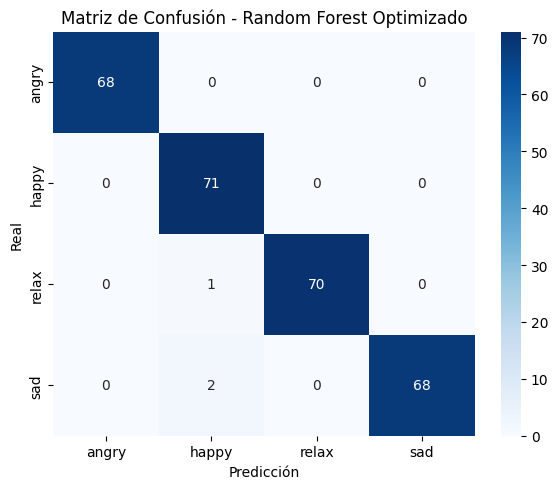

In [79]:
# ===========================
# Validación cruzada y búsqueda de hiperparámetros
# ===========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring='f1_macro',   # mide el equilibrio entre precisión y recall
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Entrenamiento
print("🔍 Entrenando modelo Random Forest (esto puede tardar unos minutos)...")
grid_search_rf.fit(X, y)

# ===========================
# Resultados del modelo
# ===========================
print("\n✅ Mejores hiperparámetros encontrados:")
print(grid_search_rf.best_params_)

print("\n📊 Mejor puntaje F1 (macro promedio):")
print(round(grid_search_rf.best_score_, 4))

# ===========================
# Evaluación sobre todo el conjunto (solo demostración)
# ===========================
y_pred = grid_search_rf.predict(X)

print("\n=== Reporte de Clasificación (Random Forest Optimizado) ===")
print(classification_report(y, y_pred))

# Matriz de confusión
cm = confusion_matrix(y, y_pred, labels=grid_search_rf.best_estimator_.named_steps['modelo'].classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid_search_rf.best_estimator_.named_steps['modelo'].classes_,
            yticklabels=grid_search_rf.best_estimator_.named_steps['modelo'].classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest Optimizado')
plt.tight_layout()
plt.show()


- Todas las clases ("angry", "happy", "relax", "sad") presentan F1-scores entre 0.98 y 1.00, lo que indica un balance casi perfecto entre precisión y recall.
- La clase "happy", que antes mostraba debilidad, ahora alcanza un recall perfecto (1.00) y un F1-score de 0.98.
- La clase "sad", mejora significativamente a 0.97, con precisión perfecta.
- La matriz de confusión respalda los valores del reporte de clasificación, confirmando que el modelo no solo tiene buenas métricas, sino también una distribución de errores muy controlada.

